<a id="3"></a>
# <p style="padding:10px;background-color:#fda628 ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Import Libraries </p>

In [2]:
import warnings
warnings.filterwarnings("ignore")
from numpy import asarray
import numpy as np
import pandas as pd
from PIL import Image
import cv2
import glob
import os 
import random
import subprocess
import matplotlib.pyplot as plt
from skimage.io import imread
from matplotlib.patches import Rectangle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, Input, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import random
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from collections import Counter


<a id="4"></a>
# <p style="padding:10px;background-color:#fda628 ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Import Dataset </p>

In [3]:
image_list_other = []
image_list_safe = []
image_list_talking = []
image_list_text = []
image_list_turn = []

for other in os.listdir("/Users/prajwalgowdakr/Desktop/fullstack/DriverBehavior/DriverBehaviorProject/Driver-Behavior-Dataset/BackEnd/other_activities"): 
    if other.endswith(".png") or other.endswith(".jpg"): 
        image_list_other.append(os.path.join("/Users/prajwalgowdakr/Desktop/fullstack/DriverBehavior/DriverBehaviorProject/Driver-Behavior-Dataset/BackEnd/other_activities",
                                             other))
        print(os.path.join("/Users/prajwalgowdakr/Desktop/fullstack/DriverBehavior/DriverBehaviorProject/Driver-Behavior-Dataset/BackEnd/other_activities", other))
        
for safe in os.listdir("/Users/prajwalgowdakr/Desktop/fullstack/DriverBehavior/DriverBehaviorProject/Driver-Behavior-Dataset/BackEnd/safe_driving"): 
    if safe.endswith(".png") or safe.endswith(".jpg"): 
        image_list_safe.append(os.path.join("/Users/prajwalgowdakr/Desktop/fullstack/DriverBehavior/DriverBehaviorProject/Driver-Behavior-Dataset/BackEnd/safe_driving", 
                                            safe))
        print(os.path.join("/Users/prajwalgowdakr/Desktop/fullstack/DriverBehavior/DriverBehaviorProject/Driver-Behavior-Dataset/BackEnd/safe_driving",
                           safe))
        
for talking in os.listdir("/Users/prajwalgowdakr/Desktop/fullstack/DriverBehavior/DriverBehaviorProject/Driver-Behavior-Dataset/BackEnd/talking_phone"): 
    if talking.endswith(".png") or talking.endswith(".jpg"): 
        image_list_talking.append(os.path.join("/Users/prajwalgowdakr/Desktop/fullstack/DriverBehavior/DriverBehaviorProject/Driver-Behavior-Dataset/BackEnd/talking_phone", 
                                               talking))
        print(os.path.join("/Users/prajwalgowdakr/Desktop/fullstack/DriverBehavior/DriverBehaviorProject/Driver-Behavior-Dataset/BackEnd/talking_phone",
                           talking))
        
for text in os.listdir("/Users/prajwalgowdakr/Desktop/fullstack/DriverBehavior/DriverBehaviorProject/Driver-Behavior-Dataset/BackEnd/texting_phone"): 
    if text.endswith(".png") or text.endswith(".jpg"): 
        image_list_text.append(os.path.join("/Users/prajwalgowdakr/Desktop/fullstack/DriverBehavior/DriverBehaviorProject/Driver-Behavior-Dataset/BackEnd/texting_phone",
                                            text))
        print(os.path.join("/Users/prajwalgowdakr/Desktop/fullstack/DriverBehavior/DriverBehaviorProject/Driver-Behavior-Dataset/BackEnd/texting_phone",
                           text))
        
for turn in os.listdir("/Users/prajwalgowdakr/Desktop/fullstack/DriverBehavior/DriverBehaviorProject/Driver-Behavior-Dataset/BackEnd/turning"): 
    if turn.endswith(".png") or turn.endswith(".jpg"): 
        image_list_turn.append(os.path.join("/Users/prajwalgowdakr/Desktop/fullstack/DriverBehavior/DriverBehaviorProject/Driver-Behavior-Dataset/BackEnd/turning",
                                            turn))
        print(os.path.join("/Users/prajwalgowdakr/Desktop/fullstack/DriverBehavior/DriverBehaviorProject/Driver-Behavior-Dataset/BackEnd/turning", 
                           turn))
    
    

/Users/prajwalgowdakr/Desktop/fullstack/DriverBehavior/DriverBehaviorProject/Driver-Behavior-Dataset/BackEnd/other_activities/img_11798.jpg
/Users/prajwalgowdakr/Desktop/fullstack/DriverBehavior/DriverBehaviorProject/Driver-Behavior-Dataset/BackEnd/other_activities/img_1493.jpg
/Users/prajwalgowdakr/Desktop/fullstack/DriverBehavior/DriverBehaviorProject/Driver-Behavior-Dataset/BackEnd/other_activities/img_11997.jpg
/Users/prajwalgowdakr/Desktop/fullstack/DriverBehavior/DriverBehaviorProject/Driver-Behavior-Dataset/BackEnd/other_activities/2019-04-2417-16-29.png
/Users/prajwalgowdakr/Desktop/fullstack/DriverBehavior/DriverBehaviorProject/Driver-Behavior-Dataset/BackEnd/other_activities/img_15918.jpg
/Users/prajwalgowdakr/Desktop/fullstack/DriverBehavior/DriverBehaviorProject/Driver-Behavior-Dataset/BackEnd/other_activities/img_12736.jpg
/Users/prajwalgowdakr/Desktop/fullstack/DriverBehavior/DriverBehaviorProject/Driver-Behavior-Dataset/BackEnd/other_activities/img_10647.jpg
/Users/prajw

In [4]:
font = {'family':'Times New Roman','color':'#1f211f'}
background_color = '#fab72f'

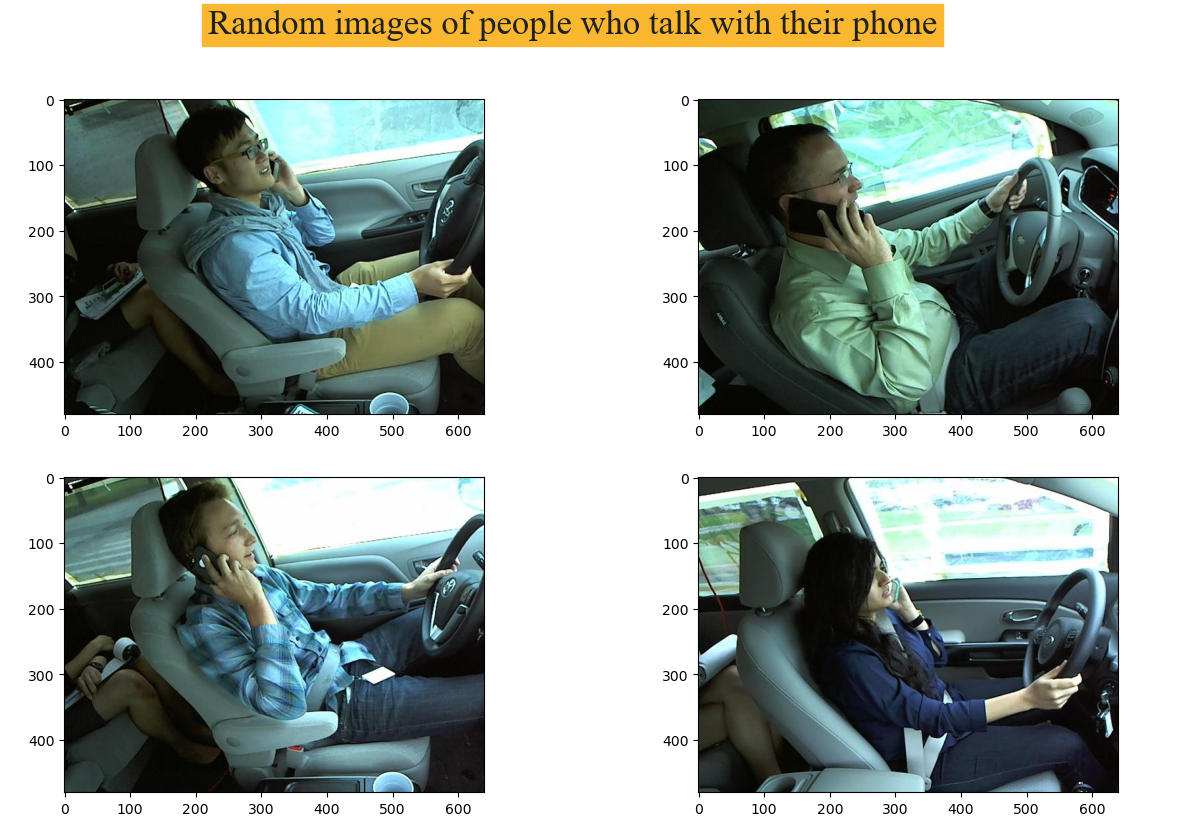

In [5]:
plt.figure(1, figsize=(15, 9))
plt.axis('off')
n = 0
for i in range(4):
    
    n += 1
    random_img = random.choice(image_list_talking)
    imgs = imread(random_img)
    plt.suptitle("Random images of people who talk with their phone",
                 fontdict = font, fontsize=25
                 ,backgroundcolor= background_color)
    plt.subplot(2,2,n)
    plt.imshow(imgs)

plt.show()

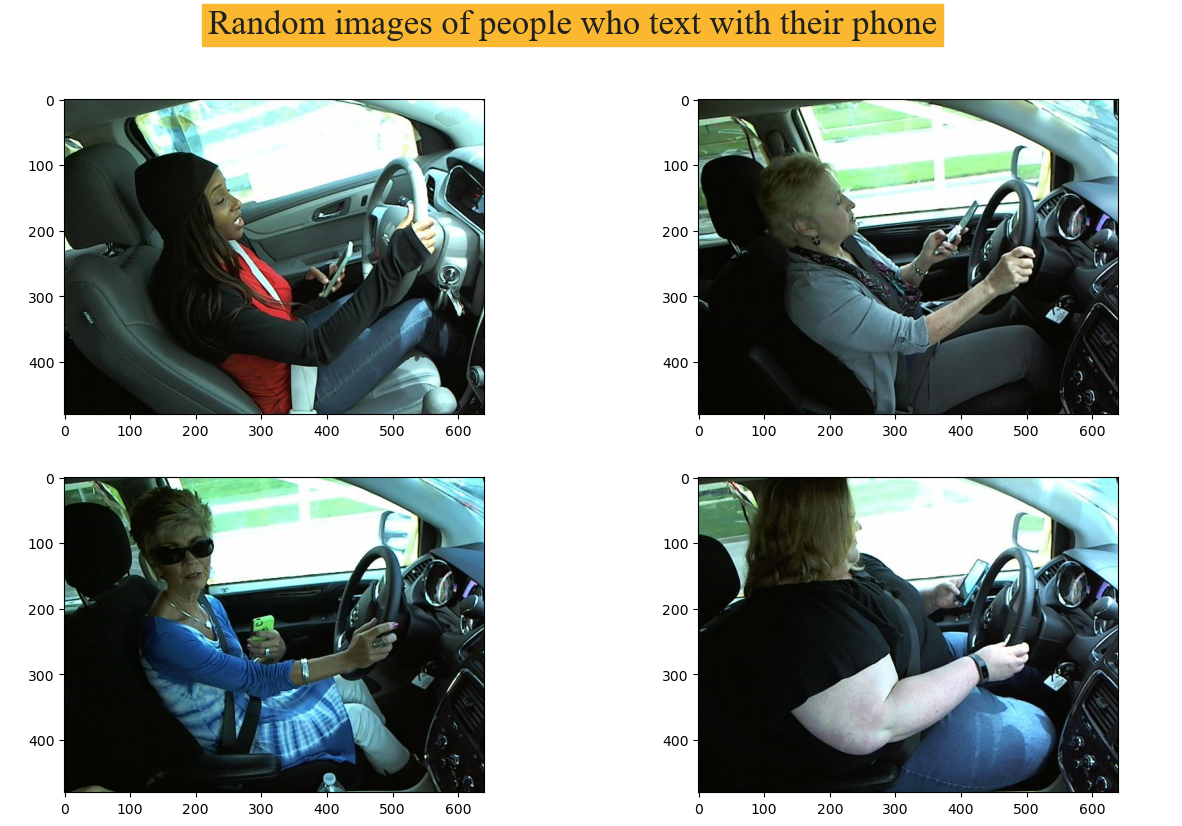

In [6]:
plt.figure(1, figsize=(15, 9))
plt.axis('off')
n = 0
for i in range(4):
    
    n += 1
    random_img = random.choice(image_list_text)
    imgs = imread(random_img)
    plt.suptitle("Random images of people who text with their phone",
                 fontdict = font, fontsize=25
                 ,backgroundcolor=background_color)
    plt.subplot(2,2,n)
    plt.imshow(imgs)

plt.show()

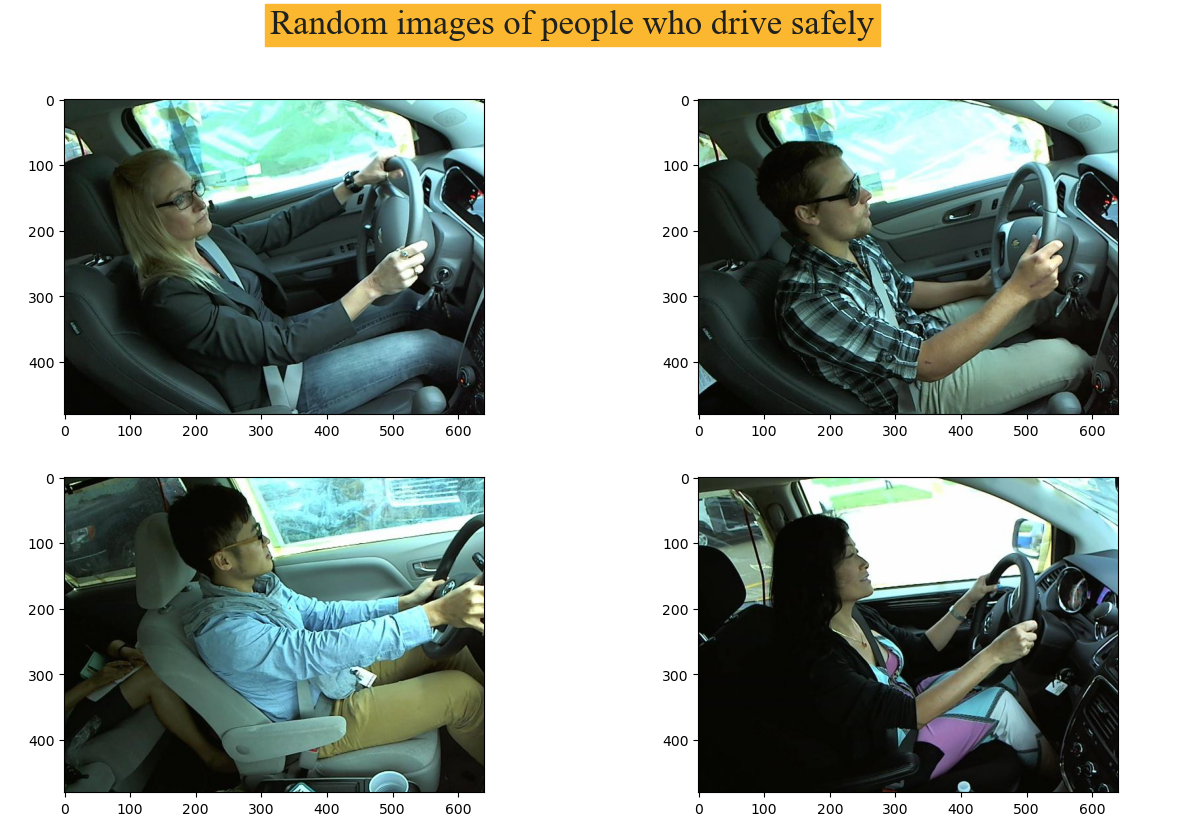

In [7]:
plt.figure(1, figsize=(15, 9))
plt.axis('off')
n = 0
for i in range(4):
    
    n += 1
    random_img = random.choice(image_list_safe)
    imgs = imread(random_img)
    plt.suptitle("Random images of people who drive safely",
                 fontdict = font, fontsize=25
                 ,backgroundcolor=background_color)
    plt.subplot(2,2,n)
    plt.imshow(imgs)

plt.show()

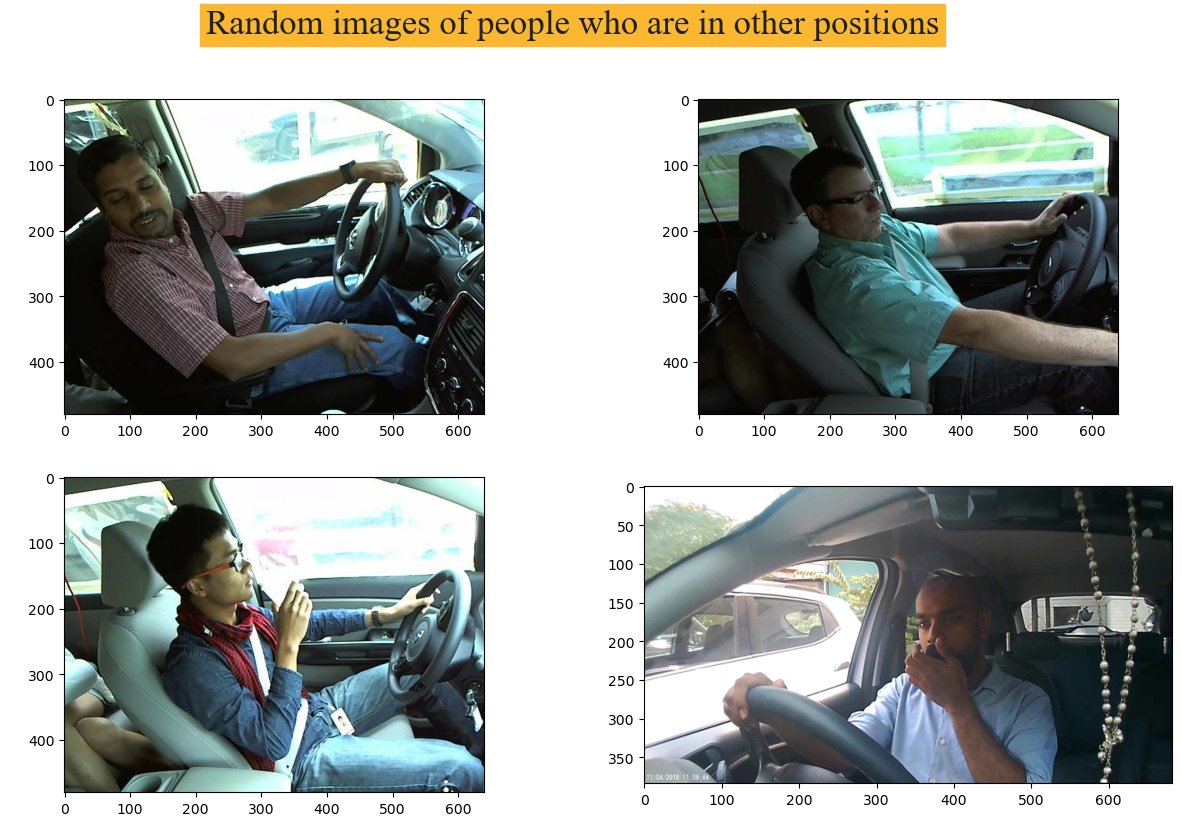

In [8]:
plt.figure(1, figsize=(15, 9))
plt.axis('off')
n = 0
for i in range(4):
    
    n += 1
    random_img = random.choice(image_list_other)
    imgs = imread(random_img)
    plt.suptitle("Random images of people who are in other positions",
                 fontdict = font, fontsize=25
                 ,backgroundcolor=background_color)
    plt.subplot(2,2,n)
    plt.imshow(imgs)

plt.show()

In [9]:
print("Number of samples in (Class = Other) = " ,len(image_list_other))
print("Number of samples in (Class = Safe Driving) = " ,len(image_list_safe))
print("Number of samples in (Class = Talking Phone) = " ,len(image_list_talking))
print("Number of samples in (Class = Texting Phone) = " ,len(image_list_text))
print("Number of samples in (Class = Turning) = " ,len(image_list_turn))

Number of samples in (Class = Other) =  808
Number of samples in (Class = Safe Driving) =  1068
Number of samples in (Class = Talking Phone) =  957
Number of samples in (Class = Texting Phone) =  431
Number of samples in (Class = Turning) =  675


In [10]:
print(.75*len(image_list_other) , .2*len(image_list_other) ,.05*len(image_list_other))
print(.75*len(image_list_safe) , .2*len(image_list_safe) ,.05*len(image_list_safe))
print(.75*len(image_list_talking) , .2*len(image_list_talking) ,.05*len(image_list_talking))
print(.75*len(image_list_text) , .2*len(image_list_text) ,.05*len(image_list_text))
print(.75*len(image_list_turn) , .2*len(image_list_turn) ,.05*len(image_list_turn))

606.0 161.60000000000002 40.400000000000006
801.0 213.60000000000002 53.400000000000006
717.75 191.4 47.85
323.25 86.2 21.55
506.25 135.0 33.75


In [11]:
print("Train","Test", "Valid")

train_other = image_list_other[:606]
test_other = image_list_other[607:767]
valid_other = image_list_other[768:]

print (len(train_other), len(test_other), len(valid_other))

train_safe = image_list_safe[:801]
test_safe = image_list_safe[802:1015]
valid_safe = image_list_safe[1016:]

print (len(train_safe), len(test_safe), len(valid_safe))

train_talking = image_list_talking[:717]
test_talking = image_list_talking[718:931]
valid_talking = image_list_talking[932:]

print (len(train_talking), len(test_talking), len(valid_talking))

train_text = image_list_text[:323]
test_text = image_list_text[324:410]
valid_text = image_list_text[411:]

print (len(train_text), len(test_text), len(valid_text))

train_turn = image_list_turn[:506]
test_turn = image_list_turn[507:642]
valid_turn = image_list_turn[643:]

print (len(train_turn), len(test_turn), len(valid_turn))

Train Test Valid
606 160 40
801 213 52
717 213 25
323 86 20
506 135 32


In [12]:
train_other_df = pd.DataFrame({'image':train_other, 'label':'Other'})
train_safe_df = pd.DataFrame({'image':train_safe, 'label':'Safe'})
train_talking_df = pd.DataFrame({'image':train_talking, 'label':'Talk'})
train_text_df = pd.DataFrame({'image':train_text, 'label':'Text'})
train_turn_df = pd.DataFrame({'image':train_turn, 'label':'Turn'})

In [13]:
test_other_df = pd.DataFrame({'image':test_other, 'label':'Other'})
test_safe_df = pd.DataFrame({'image':test_safe, 'label':'Safe'})
test_talking_df = pd.DataFrame({'image':test_talking, 'label':'Talk'})
test_text_df = pd.DataFrame({'image':test_text, 'label':'Text'})
test_turn_df = pd.DataFrame({'image':test_turn, 'label':'Turn'})

In [14]:
valid_other_df = pd.DataFrame({'image':valid_other, 'label':'Other'})
valid_safe_df = pd.DataFrame({'image':valid_safe, 'label':'Safe'})
valid_talking_df = pd.DataFrame({'image':valid_talking, 'label':'Talk'})
valid_text_df = pd.DataFrame({'image':valid_text, 'label':'Text'})
valid_turn_df = pd.DataFrame({'image':valid_turn, 'label':'Turn'})

In [15]:
train_df = pd.concat([train_other_df, train_safe_df, train_talking_df, train_text_df, train_turn_df])
test_df = pd.concat([test_other_df, test_safe_df, test_talking_df, test_text_df, test_turn_df])
val_df = pd.concat([valid_other_df, valid_safe_df, valid_talking_df, valid_text_df, valid_turn_df])

In [16]:
train_df.head()

image  label
0  /Users/prajwalgowdakr/Desktop/fullstack/Driver...  Other
1  /Users/prajwalgowdakr/Desktop/fullstack/Driver...  Other
2  /Users/prajwalgowdakr/Desktop/fullstack/Driver...  Other
3  /Users/prajwalgowdakr/Desktop/fullstack/Driver...  Other
4  /Users/prajwalgowdakr/Desktop/fullstack/Driver...  Other

In [17]:
val_df.tail()

image label
27  /Users/prajwalgowdakr/Desktop/fullstack/Driver...  Turn
28  /Users/prajwalgowdakr/Desktop/fullstack/Driver...  Turn
29  /Users/prajwalgowdakr/Desktop/fullstack/Driver...  Turn
30  /Users/prajwalgowdakr/Desktop/fullstack/Driver...  Turn
31  /Users/prajwalgowdakr/Desktop/fullstack/Driver...  Turn

In [18]:
print("Number of rows in train dataframe is: ", len(train_df))
print("Number of rows in test dataframe is: ", len(test_df))
print("Number of rows in val dataframe is: ", len(val_df))

Number of rows in train dataframe is:  2953
Number of rows in test dataframe is:  807
Number of rows in val dataframe is:  169


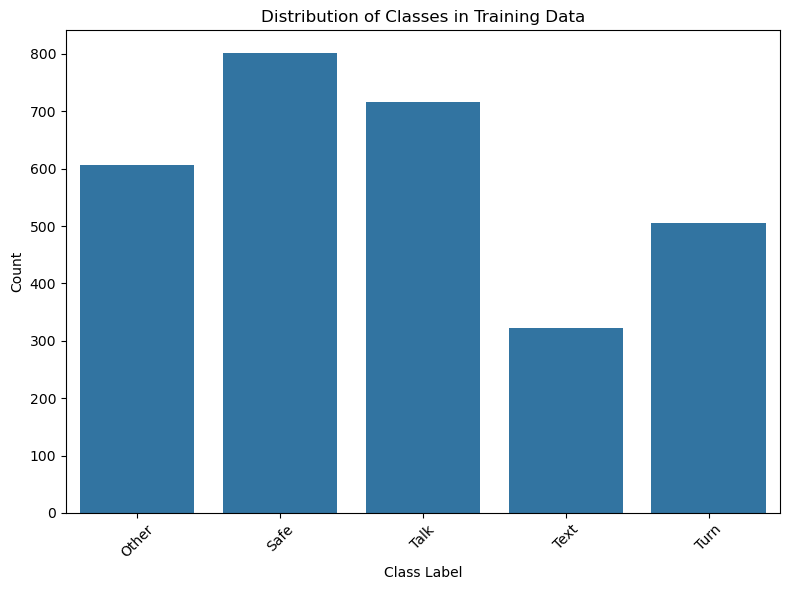

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of classes in train_df
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=train_df)
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Distribution of Classes in Training Data')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()



5. Calculate the ratio of images

   It's really important in some cases for knowing the ratio of images that we use. We can use cv2.imread for this part.

In [20]:
random_img_height = random.choice(train_other)

6. Define hyperparameters

    Some of the hyperparameters should be considering before the model goes to start. I set Batch size as 64, ofcourse you can use 32 or any     other popular numbers or you can use some functions for checking the best number of that but it costs lots of run time and I just want       to pick some experimental value. Also for AlexNet, ResNet and VGGNet its popular to use height and width as a 240*240 format.

In [39]:
Batch_size = 64
Img_height = 240
Img_width = 240

7. Rescale the images

     Its really important to rescale the images and put all of the images in a same shape for input layer of model.

In [40]:
trainGenerator = ImageDataGenerator(
    rescale=1./255,
    zca_whitening=True,
    rotation_range=30.,
    fill_mode='nearest',
)
valGenerator = ImageDataGenerator(rescale=1./255.)
testGenerator = ImageDataGenerator(rescale=1./255.)

8. Input Model

Now we can use flow from dataframe that mentioned before. It helps to call images from some dataframes and mention the label as target.

In [41]:
trainDataset = trainGenerator.flow_from_dataframe(
  dataframe=train_df,
  class_mode="categorical",
  x_col="image",
  y_col="label",
  batch_size=Batch_size,
  seed=42,
  shuffle=True,
  target_size=(Img_height,Img_width) #set the height and width of the images
)

testDataset = testGenerator.flow_from_dataframe(
  dataframe=test_df,
  class_mode='categorical',
  x_col="image",
  y_col="label",
  batch_size=Batch_size,
  seed=42,
  shuffle=True,
  target_size=(Img_height,Img_width)
)

valDataset = valGenerator.flow_from_dataframe(
  dataframe=val_df,
  class_mode='categorical',
  x_col="image",
  y_col="label",
  batch_size=Batch_size,
  seed=42,
  shuffle=True,
  target_size=(Img_height,Img_width)
)

Found 2953 validated image filenames belonging to 5 classes.
Found 807 validated image filenames belonging to 5 classes.
Found 169 validated image filenames belonging to 5 classes.


<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **1. What is AlexNet?**

  - AlexNet is a convolutional neural network (CNN) architecture that was introduced by Alex Krizhevsky, Ilya Sutskever, and Geoffrey Hinton in 2012. It is used primarily for image recognition and classification tasks. AlexNet was the winner of the ImageNet Large Scale Visual Recognition Challenge in 2012, which marked a breakthrough in deep learning. The network contains eight layers; the first five are convolutional layers, some of them followed by max-pooling layers, and the last three are fully connected layers. The network is split into two copies, each run on one GPU. AlexNet uses ReLU activation functions and dropout regularization to prevent overfitting. The architecture of AlexNet has inspired many other CNN architectures that have been developed since its introduction.
   


<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **2. Model Structure**

  - You can see the structure of AlexNet in the cell below.
   


In [42]:
def AlexNet():
    inp = layers.Input((240, 240, 3))
    x = layers.Conv2D(96, 11, 4, activation='relu')(inp)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(3, 2)(x)
    x = layers.Conv2D(256, 5, 1, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(3, 2)(x)
    x = layers.Conv2D(384, 3, 1, activation='relu')(x)
    x = layers.SeparableConv2D(384, 3, 1, activation='relu')(x)  # Novel SeparableConv2D layer
    x = layers.Conv2D(384, 3, 1, activation='relu')(x)
    x = layers.Conv2D(256, 3, 1, activation='relu')(x)
    x = layers.MaxPooling2D(3, 2)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(5, activation='softmax')(x)

    model_Alex = models.Model(inputs=inp, outputs=x)

    return model_Alex

model_Alex = AlexNet()
model_Alex.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 240, 240, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 58, 58, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 58, 58, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 28, 28, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 24, 24, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 11, 11, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 9, 9, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 7, 7, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 5, 5, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4096)           │     4,198,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 5)              │        20,485 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,748,805 (94.41 MB)

 Trainable params: 24,748,101 (94.41 MB)

 Non-trainable params: 704 (2.75 KB)

python(71195) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(71196) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


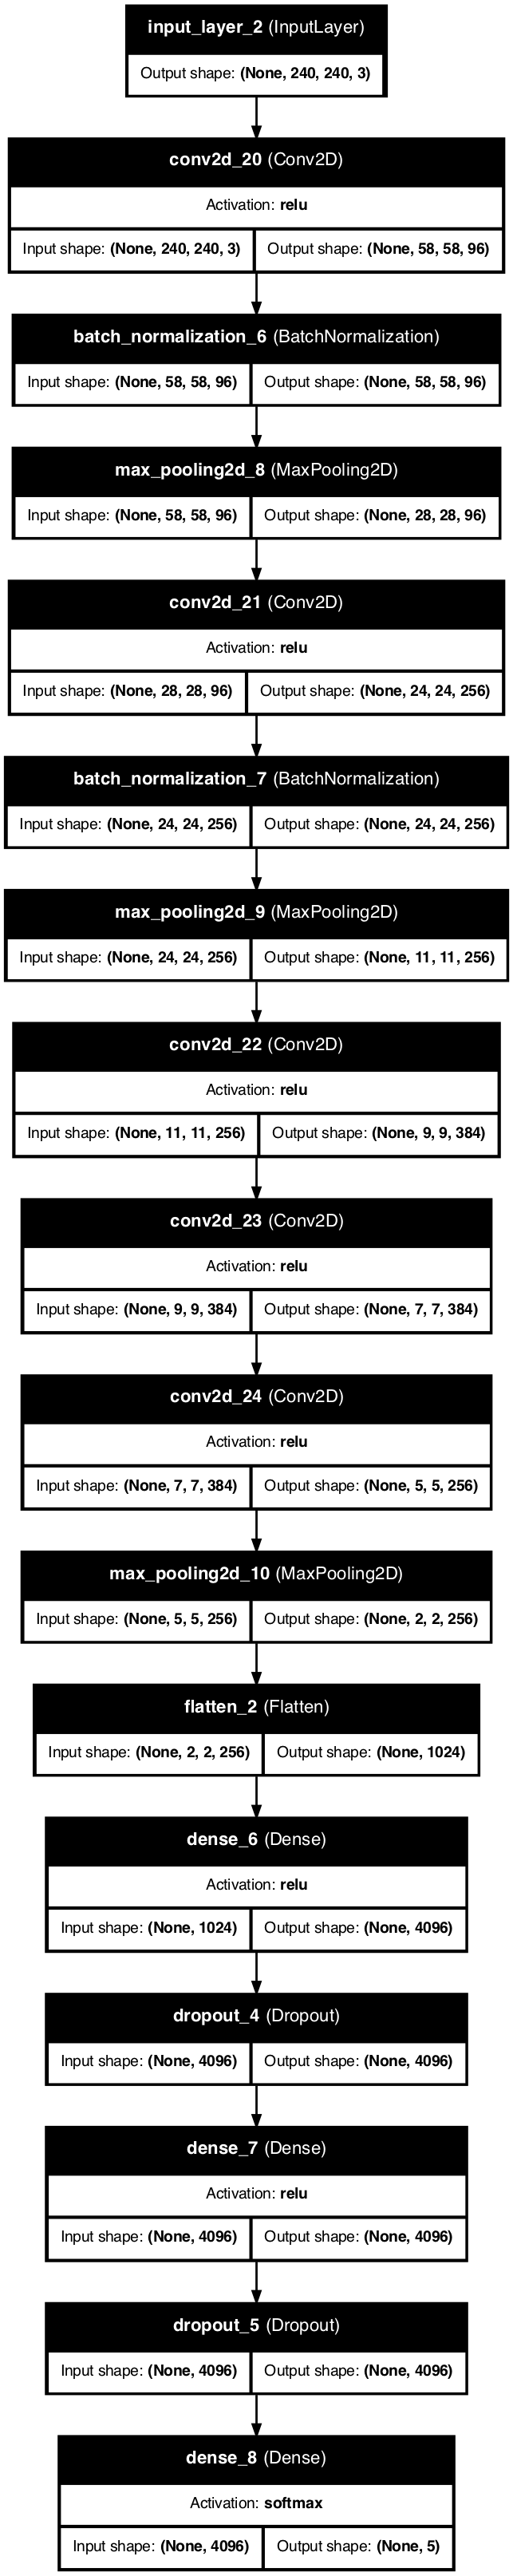

In [103]:
tf.keras.utils.plot_model(
    model_Alex,
    to_file='alexnet_model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    show_layer_activations=True,
    dpi=100
)

In [43]:
model_Alex.compile(loss=BinaryCrossentropy(),
              optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [44]:
Alex_model = model_Alex.fit(trainDataset, epochs=20, validation_data=valDataset)

Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 171s 3s/step - accuracy: 0.2578 - loss: 1.1851 - val_accuracy: 0.2840 - val_loss: 0.5065
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 173s 4s/step - accuracy: 0.4046 - loss: 0.4515 - val_accuracy: 0.2781 - val_loss: 0.4991
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 166s 3s/step - accuracy: 0.4624 - loss: 0.4179 - val_accuracy: 0.2544 - val_loss: 0.4936
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 168s 3s/step - accuracy: 0.5122 - loss: 0.3876 - val_accuracy: 0.4615 - val_loss: 0.4315
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 147s 3s/step - accuracy: 0.5397 - loss: 0.3724 - val_accuracy: 0.4260 - val_loss: 0.4184
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 163s 3s/step - accuracy: 0.5768 - loss: 0.3531 - val_accuracy: 0.5148 - val_loss: 0.4059
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 193s 4s/step - accuracy: 0.6237 - loss: 0.3183 - val_accuracy: 0.6686 - val_loss: 0.2864
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 155s 3s/step - accuracy: 0.6915 - loss: 0.2754 - val_accuracy: 0.6746 - v

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **3. Output**

  - We can plot the output of model for each epoch. For this matter, we can use **.history** and extract the **train and valid loss and accuracy**. Then we can plot both of them and find out the path of learning.
   


In [45]:
training_loss_alex = Alex_model.history['loss']
val_loss_alex = Alex_model.history['val_loss']
training_acc_alex = Alex_model.history['accuracy']
val_acc_alex = Alex_model.history['val_accuracy']

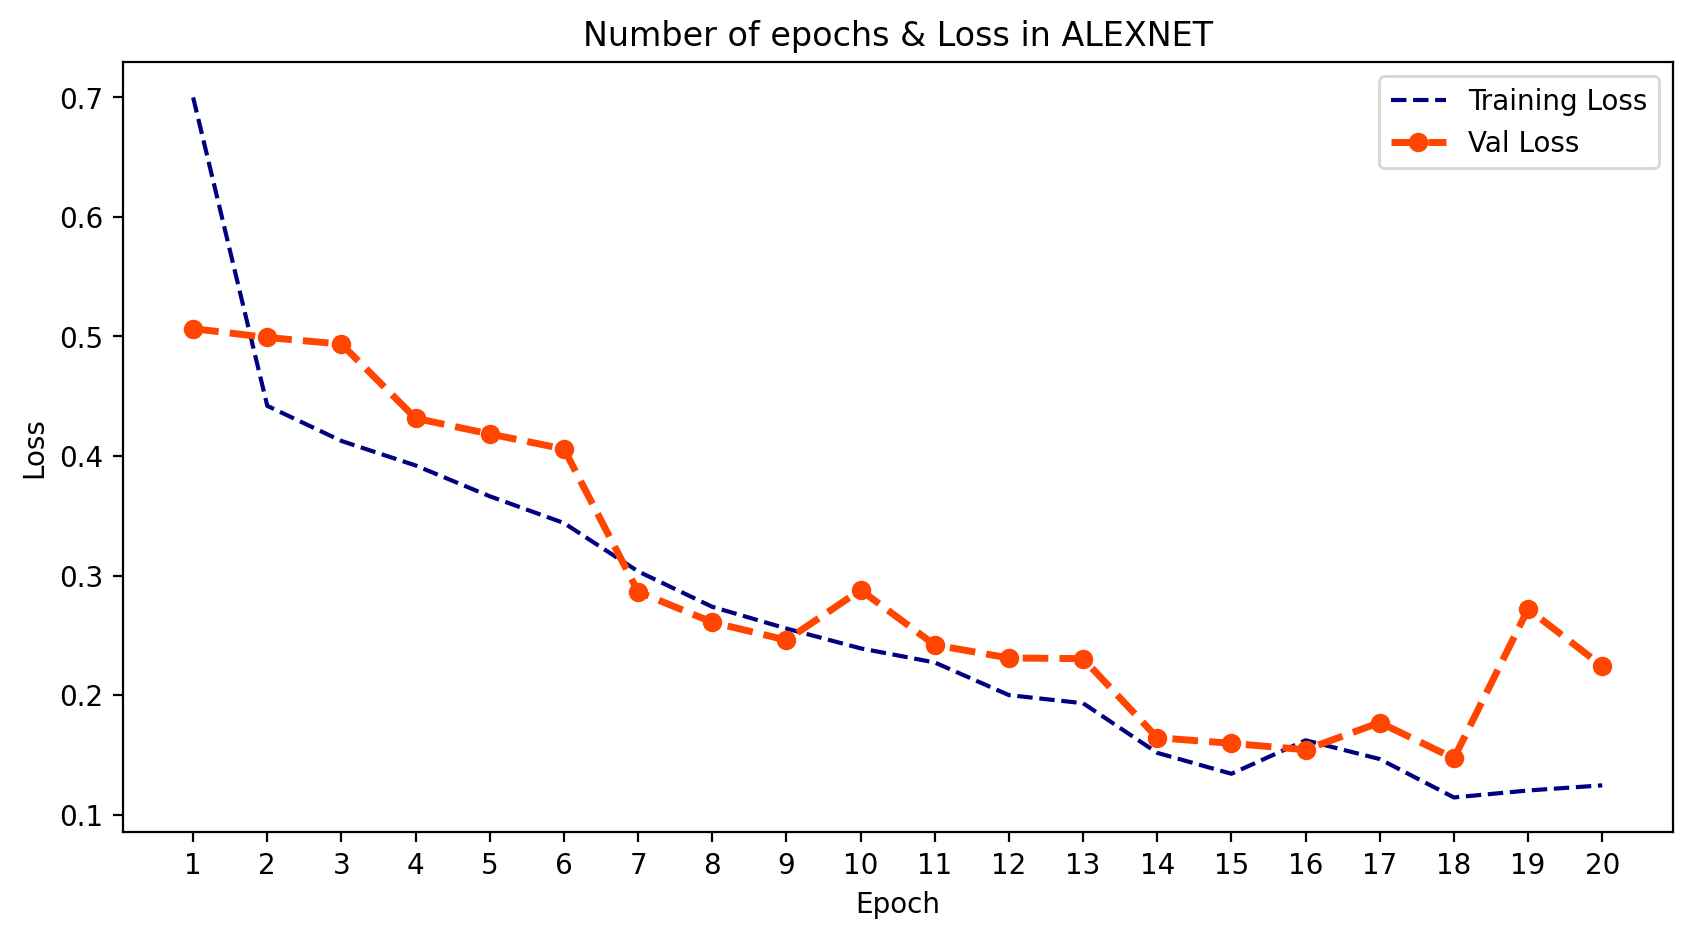

In [46]:
epoch_count = range(1, len(training_loss_alex) + 1)

# Visualize loss history
plt.figure(figsize=(10,5), dpi=200)
plt.plot(epoch_count, training_loss_alex, 'r--', color= 'navy')
plt.plot(epoch_count, val_loss_alex, '--bo',color= 'orangered', linewidth = '2.5', label='line with marker')
plt.legend(['Training Loss', 'Val Loss'])
plt.title('Number of epochs & Loss in ALEXNET')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(np.arange(1,21,1))
plt.show();

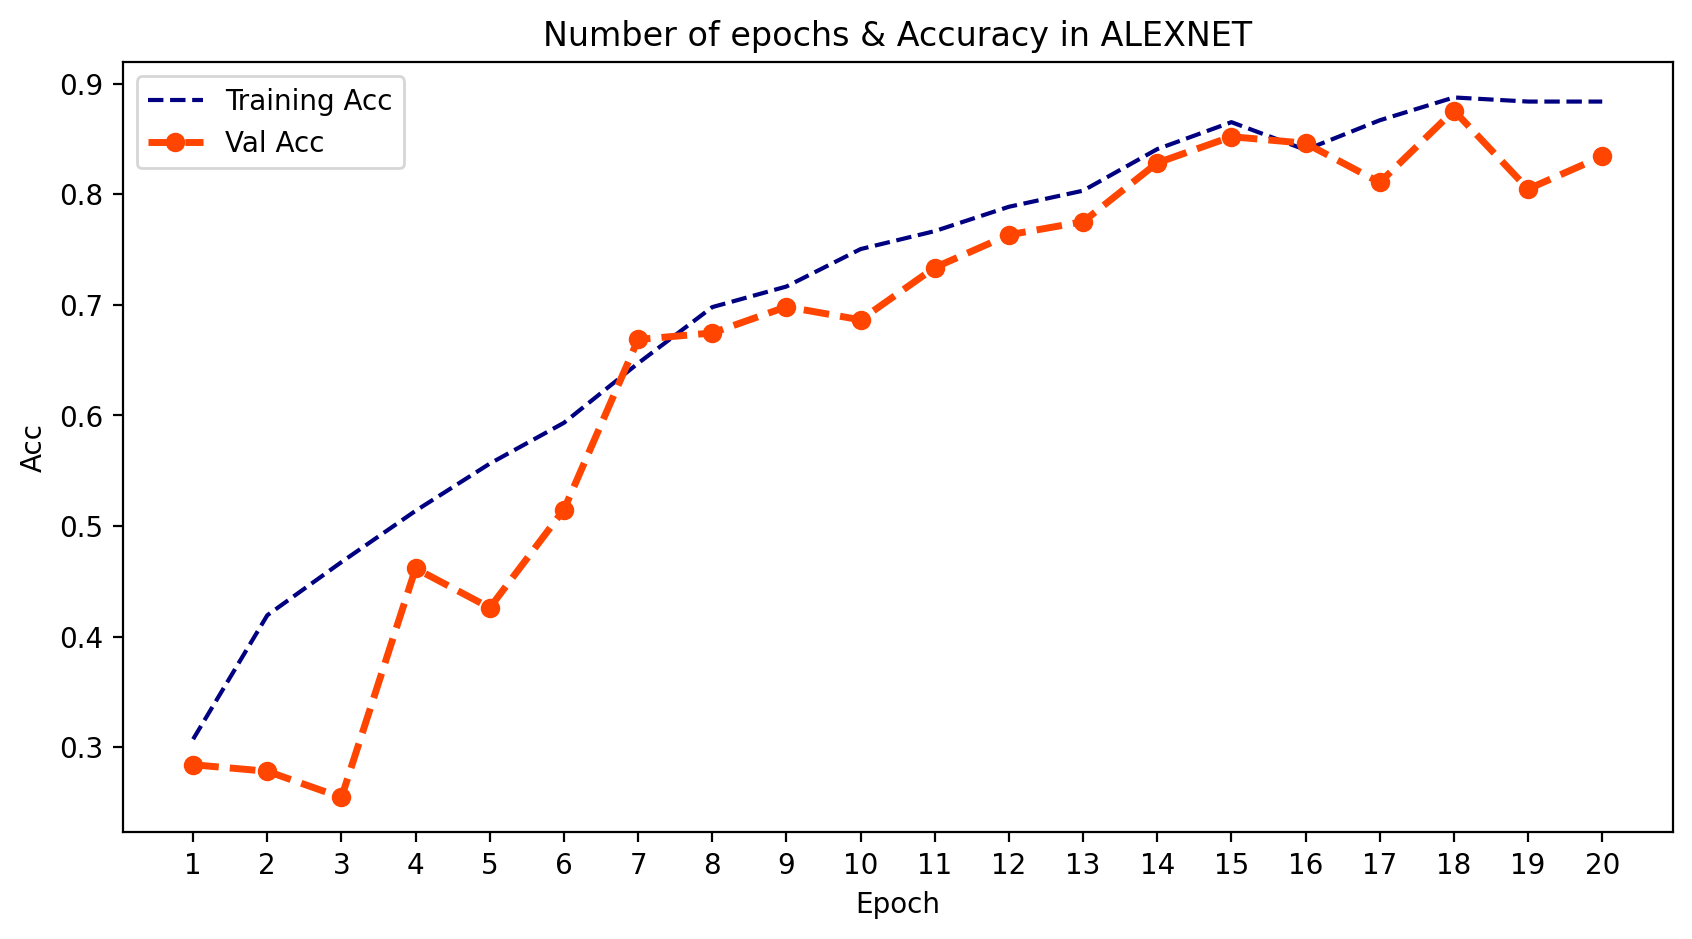

In [47]:
plt.figure(figsize=(10,5), dpi=200)
plt.plot(epoch_count, training_acc_alex, 'r--', color= 'navy')
plt.plot(epoch_count, val_acc_alex, '--bo',color= 'orangered', linewidth = '2.5', label='line with marker')
plt.legend(['Training Acc', 'Val Acc'])
plt.title('Number of epochs & Accuracy in ALEXNET')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.xticks(np.arange(1,21,1))
plt.plot();
plt.show();

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 190ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 334ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 384ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 365ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 375ms/step
Accuracy (Sampled): 0.8336
Classification Report (Sampled):
              precision    recall  f1-score   support

           0       0.68      0.84      0.75       141
           1       0.91      0.92      0.92       172
           2       0.80      0.91      0.86        81
           3       0.95      0.81      0.87        73
           4       0.94      0.63      0.76       104

    accuracy                           0.83       571
   macro avg       0.86      0.82      0.83       571
weighted avg       0.85      0.83      0.83       571

[[118   4  15   0   4]
 [ 13 159   0   0   0]
 [  7   0  74   0

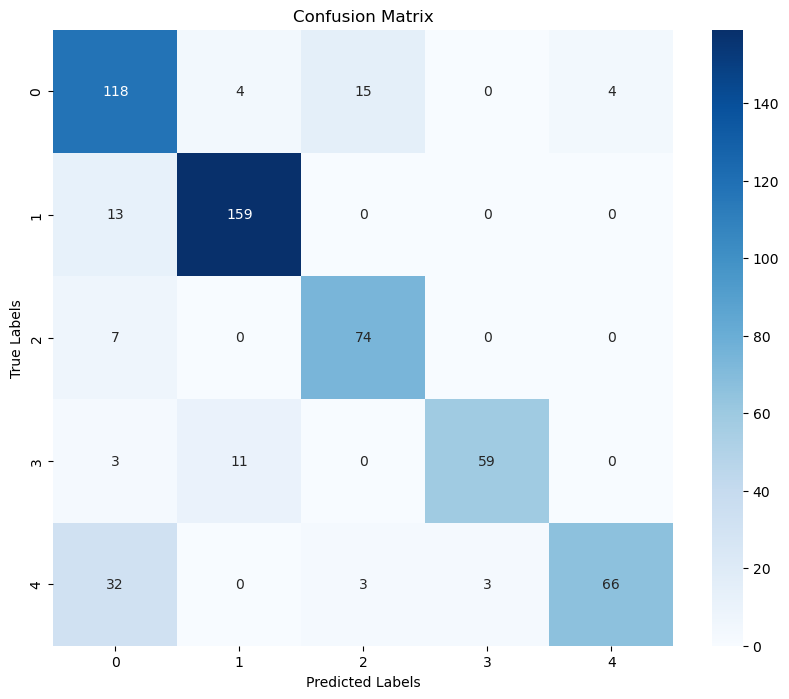

In [48]:
# Define a function to sample data from a DataFrameIterator
def sample_from_iterator(iterator, sample_size):
    sampled_data = []
    for _ in range(sample_size):
        try:
            x_batch, y_batch = next(iterator)
            sampled_data.append((x_batch, y_batch))
        except StopIteration:
            break
    return sampled_data

# Reset the iterator
valDataset.reset()

# Sample size
sample_size = 10 # Adjust as needed

# Sample from the iterator
sampled_data = sample_from_iterator(valDataset, sample_size)
# Initialize lists for predictions and true labels
val_predictions = []
y_true = []

# Process sampled data
for x_batch, y_batch in sampled_data:
    # Make predictions for the batch using the trained model
    batch_predictions = model_Alex.predict(x_batch)
    val_predictions.append(batch_predictions)
    y_true.append(y_batch)

# Concatenate predictions and true labels
val_predictions = np.concatenate(val_predictions, axis=0)
y_true = np.concatenate(y_true, axis=0)

# Get predicted labels
y_pred = np.argmax(val_predictions, axis=1)

# Convert y_true from one-hot to label indices (if needed)
y_true_labels = np.argmax(y_true, axis=1) if y_true.ndim > 1 else y_true

# Calculate and print accuracy
accuracy = accuracy_score(y_true_labels, y_pred)
print(f"Accuracy (Sampled): {accuracy:.4f}")

# Generate classification report
print("Classification Report (Sampled):")
print(classification_report(y_true_labels, y_pred))

# Optionally, plot the confusion matrix
conf_matrix = confusion_matrix(y_true_labels, y_pred)
print(conf_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=[str(i) for i in range(conf_matrix.shape[1])], 
            yticklabels=[str(i) for i in range(conf_matrix.shape[0])])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


<a id="7"></a>
# <p style="padding:10px;background-color:#fab72f ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">VGGNet </p>

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **1. What is VGGNet?**

  - VGGNet, also known as Visual Geometry Group, is a standard deep Convolutional Neural Network (CNN) architecture with multiple layers. The “deep” refers to the number of layers with VGG-16 or VGG-19 consisting of 16 and 19 convolutional layers, respectively. The VGG architecture is the basis of ground-breaking object recognition models. Developed as a deep neural network, the VGGNet also surpasses baselines on many tasks and datasets beyond ImageNet. Moreover, it is still one of the most popular image recognition architectures.
   


2. Model Structure

    You can see the structure of VGGNet in the cell below.


In [70]:
trainGenerator = ImageDataGenerator(
    rescale=1./255,
    zca_whitening=True,
    rotation_range=30.,
    fill_mode='nearest',
)
valGenerator = ImageDataGenerator(rescale=1./255.)
testGenerator = ImageDataGenerator(rescale=1./255.)

In [71]:
trainDataset = trainGenerator.flow_from_dataframe(
  dataframe=train_df,
  class_mode="categorical",
  x_col="image",
  y_col="label",
  batch_size=Batch_size,
  seed=42,
  shuffle=True,
  target_size=(heg, wid) #set the height and width of the images
)

testDataset = testGenerator.flow_from_dataframe(
  dataframe=test_df,
  class_mode='categorical',
  x_col="image",
  y_col="label",
  batch_size=Batch_size,
  seed=42,
  shuffle=True,
  target_size=(heg,wid)
)

valDataset = valGenerator.flow_from_dataframe(
  dataframe=val_df,
  class_mode='categorical',
  x_col="image",
  y_col="label",
  batch_size=Batch_size,
  seed=42,
  shuffle=True,
  target_size=(heg,wid)
)

NameError: name 'heg' is not defined

In [73]:
Batch_size = 64
Img_height = 120
Img_width = 120

# Ensure that 'heg' and 'wid' are correctly defined
heg = 120
wid = 120

trainGenerator = ImageDataGenerator(
    rescale=1./255,
    zca_whitening=True,
    rotation_range=30.,
    fill_mode='nearest',
)

valGenerator = ImageDataGenerator(rescale=1./255.)
testGenerator = ImageDataGenerator(rescale=1./255.)

trainDataset = trainGenerator.flow_from_dataframe(
  dataframe=train_df,
  class_mode="categorical",
  x_col="image",
  y_col="label",
  batch_size=Batch_size,
  seed=42,
  shuffle=True,
  target_size=(heg, wid)  # Set the height and width of the images
)

testDataset = testGenerator.flow_from_dataframe(
  dataframe=test_df,
  class_mode='categorical',
  x_col="image",
  y_col="label",
  batch_size=Batch_size,
  seed=42,
  shuffle=True,
  target_size=(heg, wid)
)

valDataset = valGenerator.flow_from_dataframe(
  dataframe=val_df,
  class_mode='categorical',
  x_col="image",
  y_col="label",
  batch_size=Batch_size,
  seed=42,
  shuffle=True,
  target_size=(heg, wid)
)


Found 2953 validated image filenames belonging to 5 classes.
Found 807 validated image filenames belonging to 5 classes.
Found 169 validated image filenames belonging to 5 classes.


In [72]:
print(trainDataset)

In [74]:
def VGGNet():
    inp = layers.Input((120, 120, 3))
    x = layers.Conv2D(64, 3, 1, activation='relu')(inp)
    x = layers.Conv2D(64, 3, 1, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(2, 2)(x)
    x = layers.Conv2D(128, 3, 1, activation='relu')(x)
    x = layers.Conv2D(128, 3, 1, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(2, 2)(x)
    x = layers.Conv2D(256, 3, 1, activation='relu')(x)
    x = layers.Conv2D(256, 3, 1, activation='relu')(x)
    x = layers.Conv2D(256, 3, 1, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(2, 2)(x)
    x = layers.Conv2D(512, 3, 1, activation='relu')(x)
    x = layers.Conv2D(512, 3, 1, activation='relu')(x)
    x = layers.Conv2D(512, 3, 1, activation='relu')(x)
    x = layers.MaxPooling2D(2, 2)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(5, activation='softmax')(x)

    model_VGG = models.Model(inputs=inp, outputs=x)

    return model_VGG

model_VGG = VGGNet()
model_VGG.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 120, 120, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 118, 118, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 116, 116, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 116, 116, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 58, 58, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 54, 54, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 54, 54, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 27, 27, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 25, 25, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 23, 23, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 21, 21, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 21, 21, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_54 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 4096)           │     8,392,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 32,831,557 (125.24 MB)

 Trainable params: 32,830,661 (125.24 MB)

 Non-trainable params: 896 (3.50 KB)

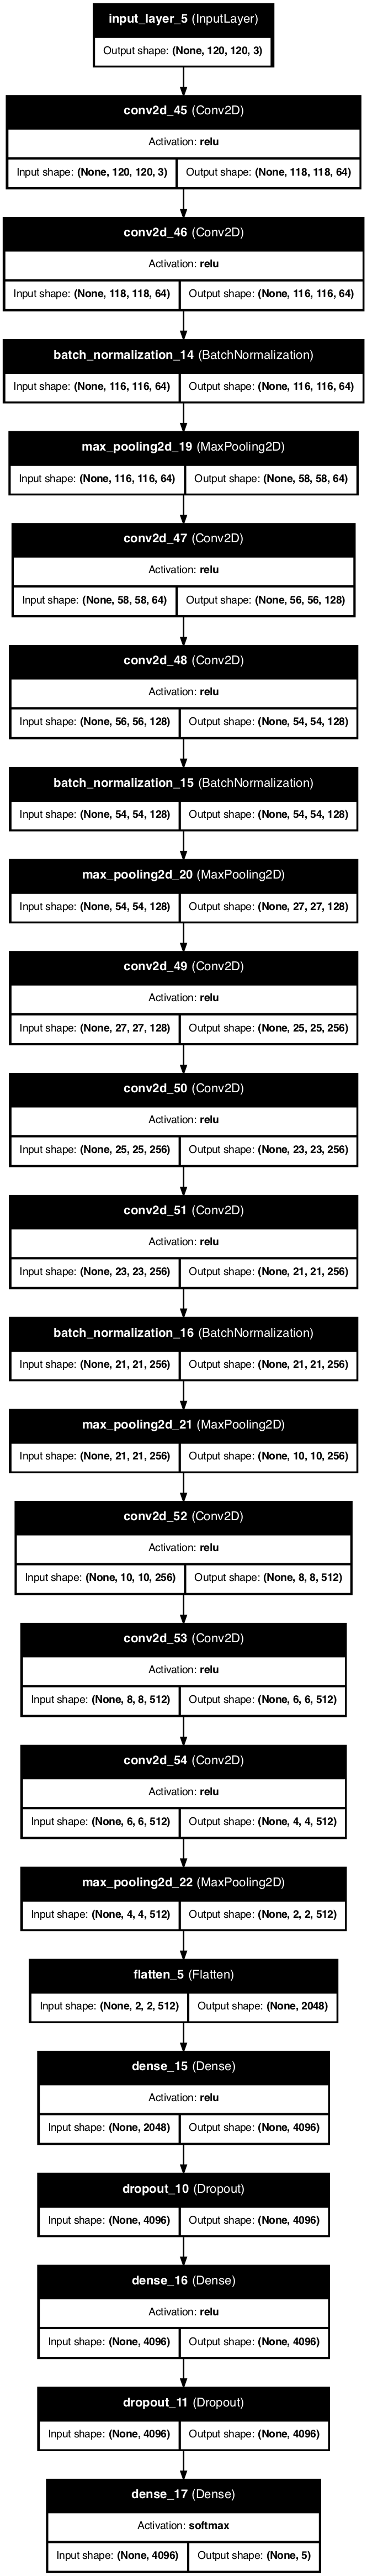

In [75]:
tf.keras.utils.plot_model(
    model_VGG,
    to_file='vgg_model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    show_layer_activations=True,
    dpi=100
)

In [76]:
model_VGG.compile(loss=BinaryCrossentropy(),
              optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [77]:
VGG_model = model_VGG.fit(trainDataset, epochs=20, validation_data=valDataset)

Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 500s 10s/step - accuracy: 0.2807 - loss: 1.6430 - val_accuracy: 0.1479 - val_loss: 0.5360
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 482s 10s/step - accuracy: 0.3991 - loss: 0.4424 - val_accuracy: 0.2426 - val_loss: 0.4983
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 501s 11s/step - accuracy: 0.4480 - loss: 0.4234 - val_accuracy: 0.3254 - val_loss: 0.4994
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 475s 10s/step - accuracy: 0.4695 - loss: 0.4126 - val_accuracy: 0.2781 - val_loss: 0.4913
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 488s 10s/step - accuracy: 0.5903 - loss: 0.3453 - val_accuracy: 0.3609 - val_loss: 0.4987
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 480s 10s/step - accuracy: 0.6424 - loss: 0.3140 - val_accuracy: 0.4734 - val_loss: 0.4193
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 474s 10s/step - accuracy: 0.6733 - loss: 0.2894 - val_accuracy: 0.5030 - val_loss: 0.4204
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 498s 11s/step - accuracy: 0.6647 - loss: 0.2945 - val_accuracy: 0.

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **3. Output**

  - We can plot the output of model for each epoch. For this matter, we can use **.history** and extract the **train and valid loss and accuracy**. Then we can plot both of them and find out the path of learning.
   


In [78]:
training_loss_vgg = VGG_model.history['loss']
val_loss_vgg = VGG_model.history['val_loss']
training_acc_vgg = VGG_model.history['accuracy']
val_acc_vgg = VGG_model.history['val_accuracy']

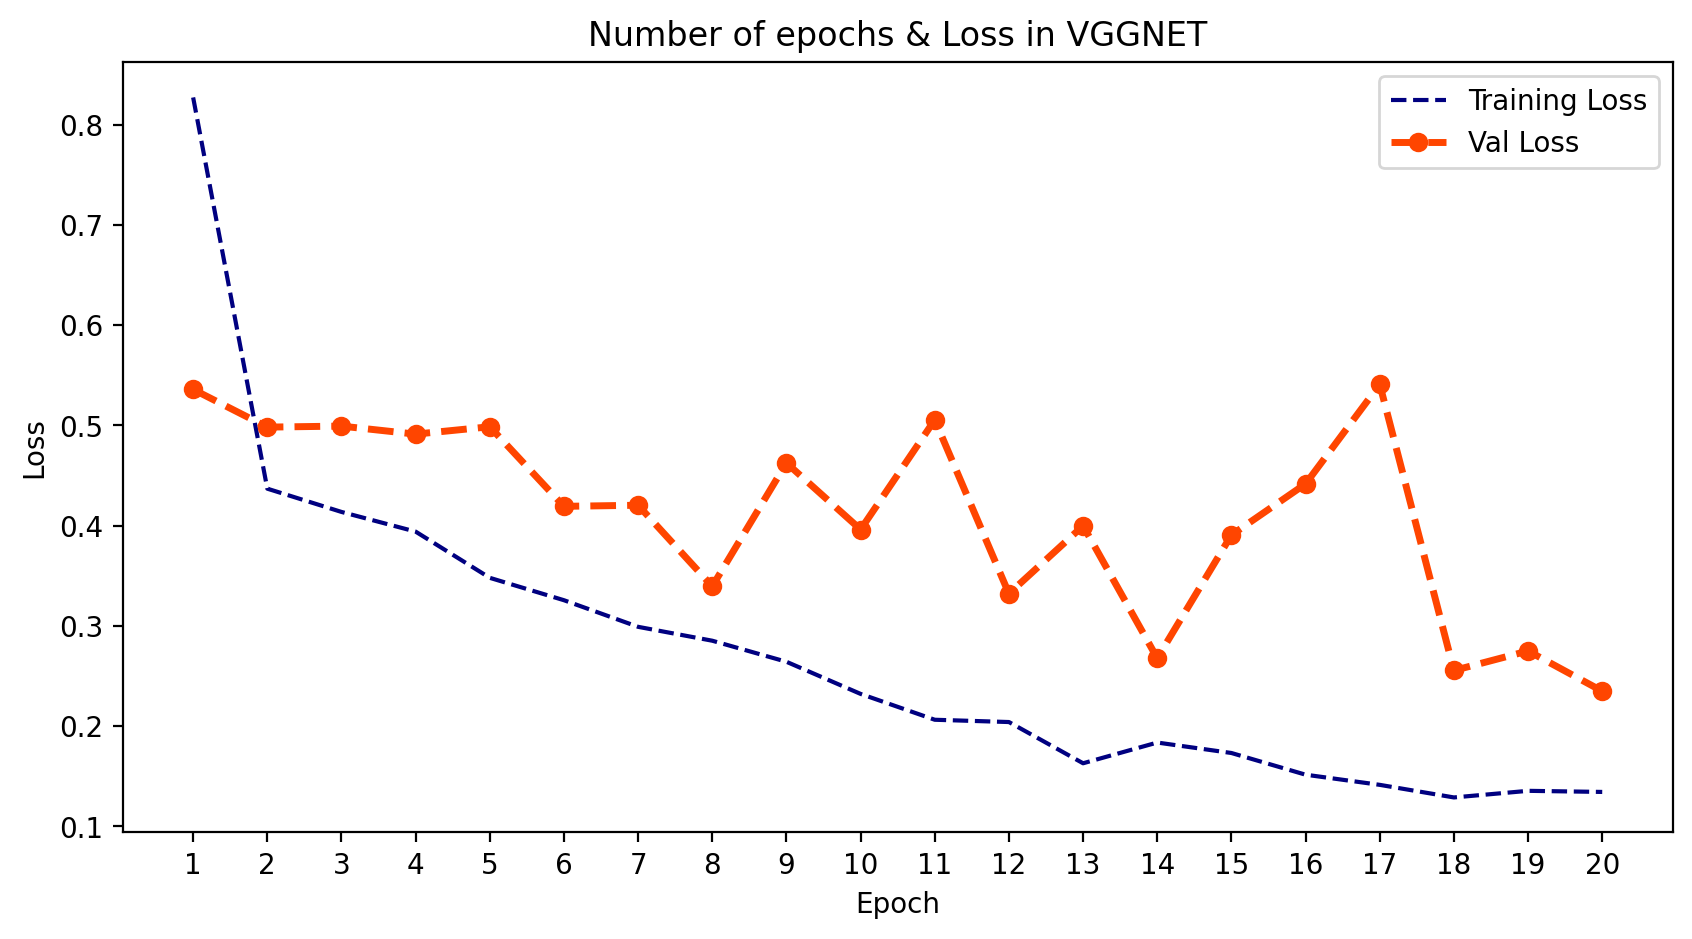

In [79]:
plt.figure(figsize=(10,5), dpi=200)
plt.plot(epoch_count, training_loss_vgg, 'r--', color= 'navy')
plt.plot(epoch_count, val_loss_vgg, '--bo',color= 'orangered', linewidth = '2.5', label='line with marker')
plt.legend(['Training Loss', 'Val Loss'])
plt.title('Number of epochs & Loss in VGGNET')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(np.arange(1,21,1))
plt.show();

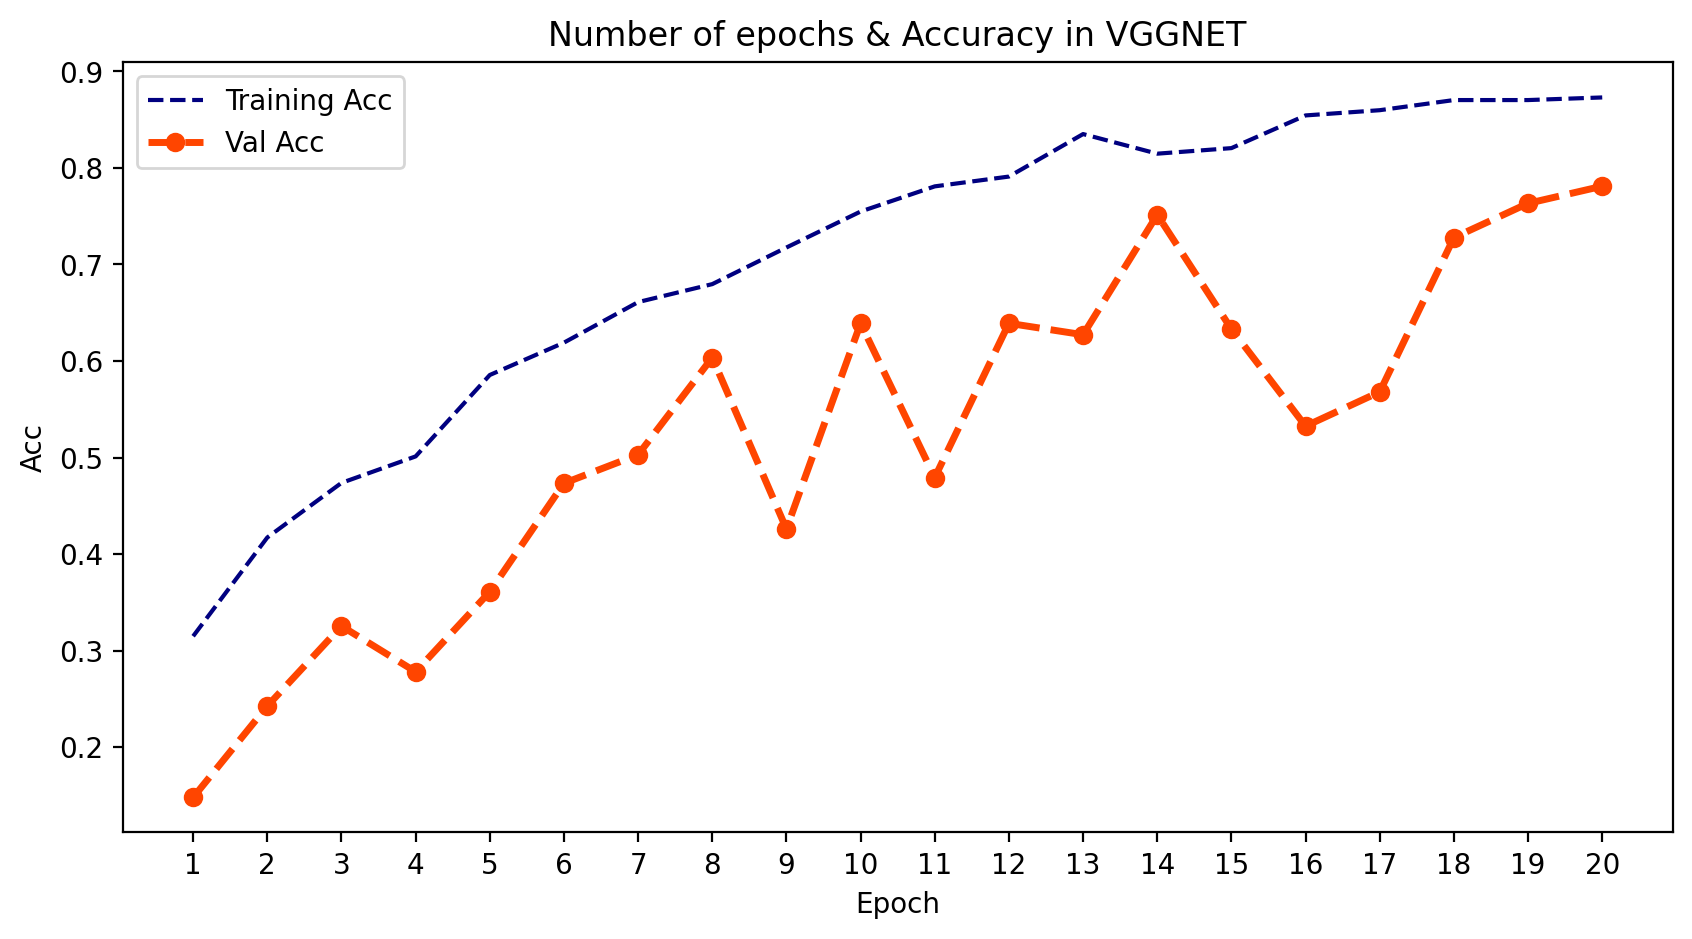

In [80]:
plt.figure(figsize=(10,5), dpi=200)
plt.plot(epoch_count, training_acc_vgg, 'r--', color= 'navy')
plt.plot(epoch_count, val_acc_vgg, '--bo',color= 'orangered', linewidth = '2.5', label='line with marker')
plt.legend(['Training Acc', 'Val Acc'])
plt.title('Number of epochs & Accuracy in VGGNET')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.xticks(np.arange(1,21,1))
plt.plot();
plt.show();

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 617ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 259ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 742ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 447ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step
Accuracy (Sampled): 0.7793
Classification Report (Sampled):
              precision    recall  f1-score   support

           0       0.61      0.85      0.71       141
           1       0.93      0.82      0.87       172
           2       0.75      0.64      0.69        81
           3       0.89      0.78      0.83        73
           4       0.85      0.72      0.78       104

    accuracy                           0.78       571
   macro avg       0.81      0.76      0.78       571
weighted avg       0.81      0.78      0.78       571

[[120   0  11   0  10]
 [ 24 141   0   7   0]
 [ 23   3  52   0   3]
 [  8

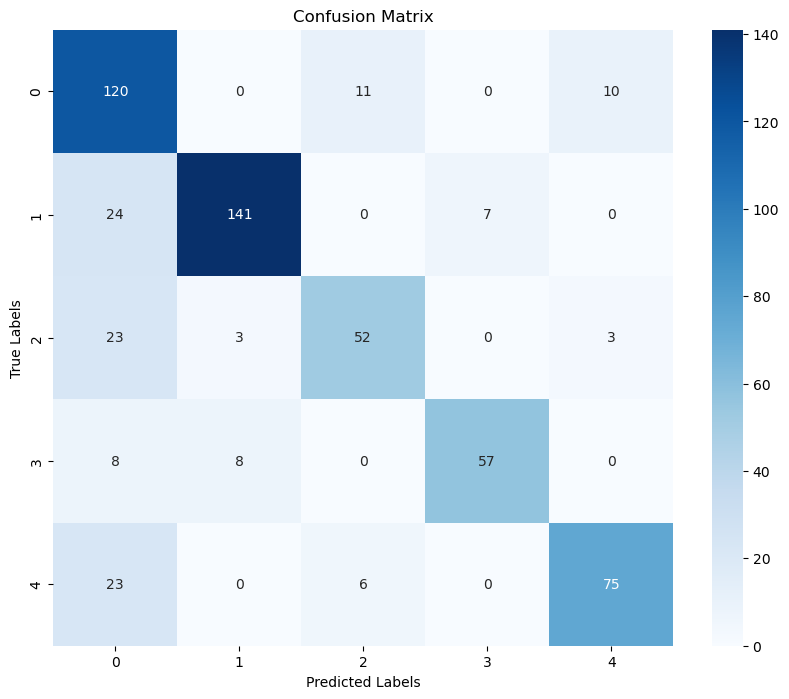

In [81]:
# Define a function to sample data from a DataFrameIterator
def sample_from_iterator(iterator, sample_size):
    sampled_data = []
    for _ in range(sample_size):
        try:
            x_batch, y_batch = next(iterator)
            sampled_data.append((x_batch, y_batch))
        except StopIteration:
            break
    return sampled_data

# Reset the iterator
valDataset.reset()

# Sample size
sample_size = 10 # Adjust as needed

# Sample from the iterator
sampled_data = sample_from_iterator(valDataset, sample_size)

# Initialize lists for predictions and true labels
val_predictions = []
y_true = []

# Process sampled data
for x_batch, y_batch in sampled_data:
    # Make predictions for the batch using the trained model
    batch_predictions = model_VGG.predict(x_batch)
    val_predictions.append(batch_predictions)
    y_true.append(y_batch)

# Concatenate predictions and true labels
val_predictions = np.concatenate(val_predictions, axis=0)
y_true = np.concatenate(y_true, axis=0)

# Get predicted labels
y_pred = np.argmax(val_predictions, axis=1)

# Convert y_true from one-hot to label indices (if needed)
y_true_labels = np.argmax(y_true, axis=1) if y_true.ndim > 1 else y_true

# Calculate and print accuracy
accuracy = accuracy_score(y_true_labels, y_pred)
print(f"Accuracy (Sampled): {accuracy:.4f}")

# Generate classification report
print("Classification Report (Sampled):")
print(classification_report(y_true_labels, y_pred))

# Optionally, plot the confusion matrix
conf_matrix = confusion_matrix(y_true_labels, y_pred)
print(conf_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=[str(i) for i in range(conf_matrix.shape[1])], 
            yticklabels=[str(i) for i in range(conf_matrix.shape[0])])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

<a id="8"></a>
# <p style="padding:10px;background-color:#fab72f ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">ResNet </p>

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **1. What is ResNet?**

  - ResNet (Residual Network) is a deep learning-based model that uses residual connections to improve training performance and accuracy. The architecture of ResNet is designed to solve the problem of vanishing gradients that occurs when training deep neural networks. ResNet introduces the concept of residual blocks, which use skip connections to connect activations of a layer to further layers by skipping some layers in between. This forms a residual block, and ResNets are made by stacking these residual blocks together. The approach behind this network is instead of layers learning the underlying mapping, we allow the network to fit the residual mapping. So, instead of say H (x), initial mapping, let the network fit, F (x) := H (x) - x which gives H (x) := F (x) + x. The skip connection connects activations of a layer to further layers by skipping some layers in between. This results in training a very deep neural network without the problems caused by vanishing/exploding gradient. ResNet is widely used in image classification tasks and has inspired many other CNN architectures that have been developed since its introduction.
   



<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **2. Model Structure**

  - You can see the structure of VGGNet in the cell below.
   


In [82]:
def ResNet34 ():
    inp = layers.Input((120, 120, 3))
    x = layers.Conv2D(64, 7, 2,padding='valid', activation='relu')(inp)
    x = layers.MaxPooling2D(strides=2, padding='same')(x)
    x = layers.Conv2D(64, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    
    
    x = layers.Conv2D(128, 3, 2,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
     
        
    x = layers.Conv2D(256, 3, 2,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(256, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(256, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(256, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(256, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(256, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    
    
    
    x = layers.Conv2D(512, 3, 2,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(512, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(512, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Flatten()(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(5, activation='softmax')(x)
    
    
    
    
    model_Res = models.Model(inputs=inp, outputs=x)

    return model_Res

model_Res = ResNet34()
model_Res.summary()


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 120, 120, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_55 (Conv2D)              │ (None, 57, 57, 64)     │         9,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_56 (Conv2D)              │ (None, 29, 29, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 29, 29, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_57 (Conv2D)              │ (None, 29, 29, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 29, 29, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_58 (Conv2D)              │ (None, 29, 29, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 29, 29, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_59 (Conv2D)              │ (None, 29, 29, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 29, 29, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_60 (Conv2D)              │ (None, 15, 15, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 15, 15, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_61 (Conv2D)              │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 15, 15, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_62 (Conv2D)              │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 15, 15, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_63 (Conv2D)              │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 15, 15, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_64 (Conv2D)              │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 8, 8, 256)      │         1,02

 Total params: 60,194,821 (229.63 MB)

 Trainable params: 60,187,141 (229.60 MB)

 Non-trainable params: 7,680 (30.00 KB)

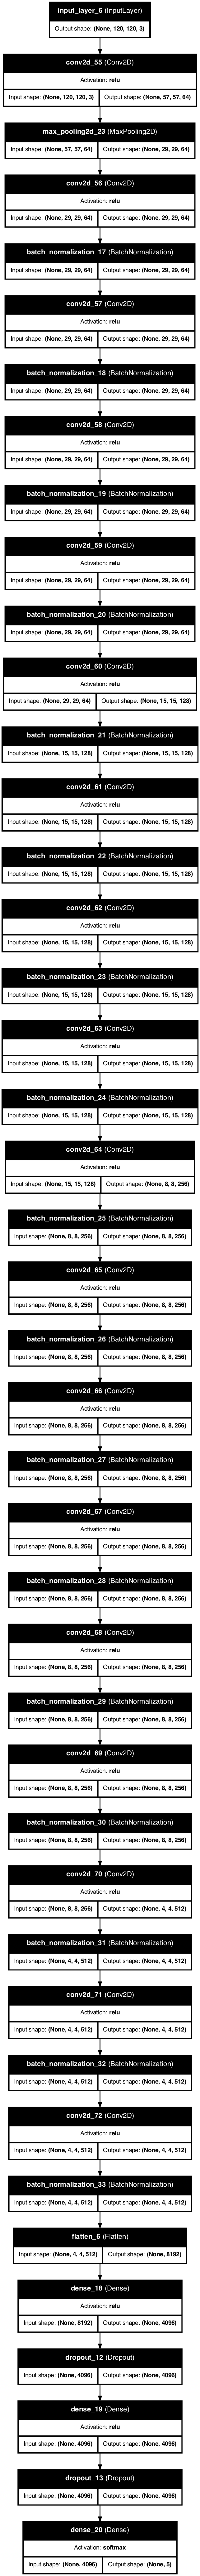

In [83]:
tf.keras.utils.plot_model(
    model_Res,
    to_file='res_model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    show_layer_activations=True,
    dpi=100
)

In [84]:
model_Res.compile(loss=BinaryCrossentropy(),
              optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [85]:
RES_model = model_Res.fit(trainDataset, epochs=20, validation_data=valDataset)

Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 201s 4s/step - accuracy: 0.2370 - loss: 1.1370 - val_accuracy: 0.1479 - val_loss: 0.5611
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 251s 5s/step - accuracy: 0.4476 - loss: 0.4456 - val_accuracy: 0.2367 - val_loss: 0.5911
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 225s 5s/step - accuracy: 0.4770 - loss: 0.4406 - val_accuracy: 0.2722 - val_loss: 0.5344
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 205s 4s/step - accuracy: 0.4760 - loss: 0.4259 - val_accuracy: 0.3373 - val_loss: 0.6690
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 219s 5s/step - accuracy: 0.5141 - loss: 0.4127 - val_accuracy: 0.3728 - val_loss: 2.4418
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 163s 3s/step - accuracy: 0.6075 - loss: 0.3341 - val_accuracy: 0.4556 - val_loss: 0.5847
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 184s 4s/step - accuracy: 0.5553 - loss: 0.3617 - val_accuracy: 0.3373 - val_loss: 1.4954
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 188s 4s/step - accuracy: 0.5805 - loss: 0.3564 - val_accuracy: 0.5621 - v

In [86]:
training_loss_res = RES_model.history['loss']
val_loss_res = RES_model.history['val_loss']
training_acc_res = RES_model.history['accuracy']
val_acc_res = RES_model.history['val_accuracy']

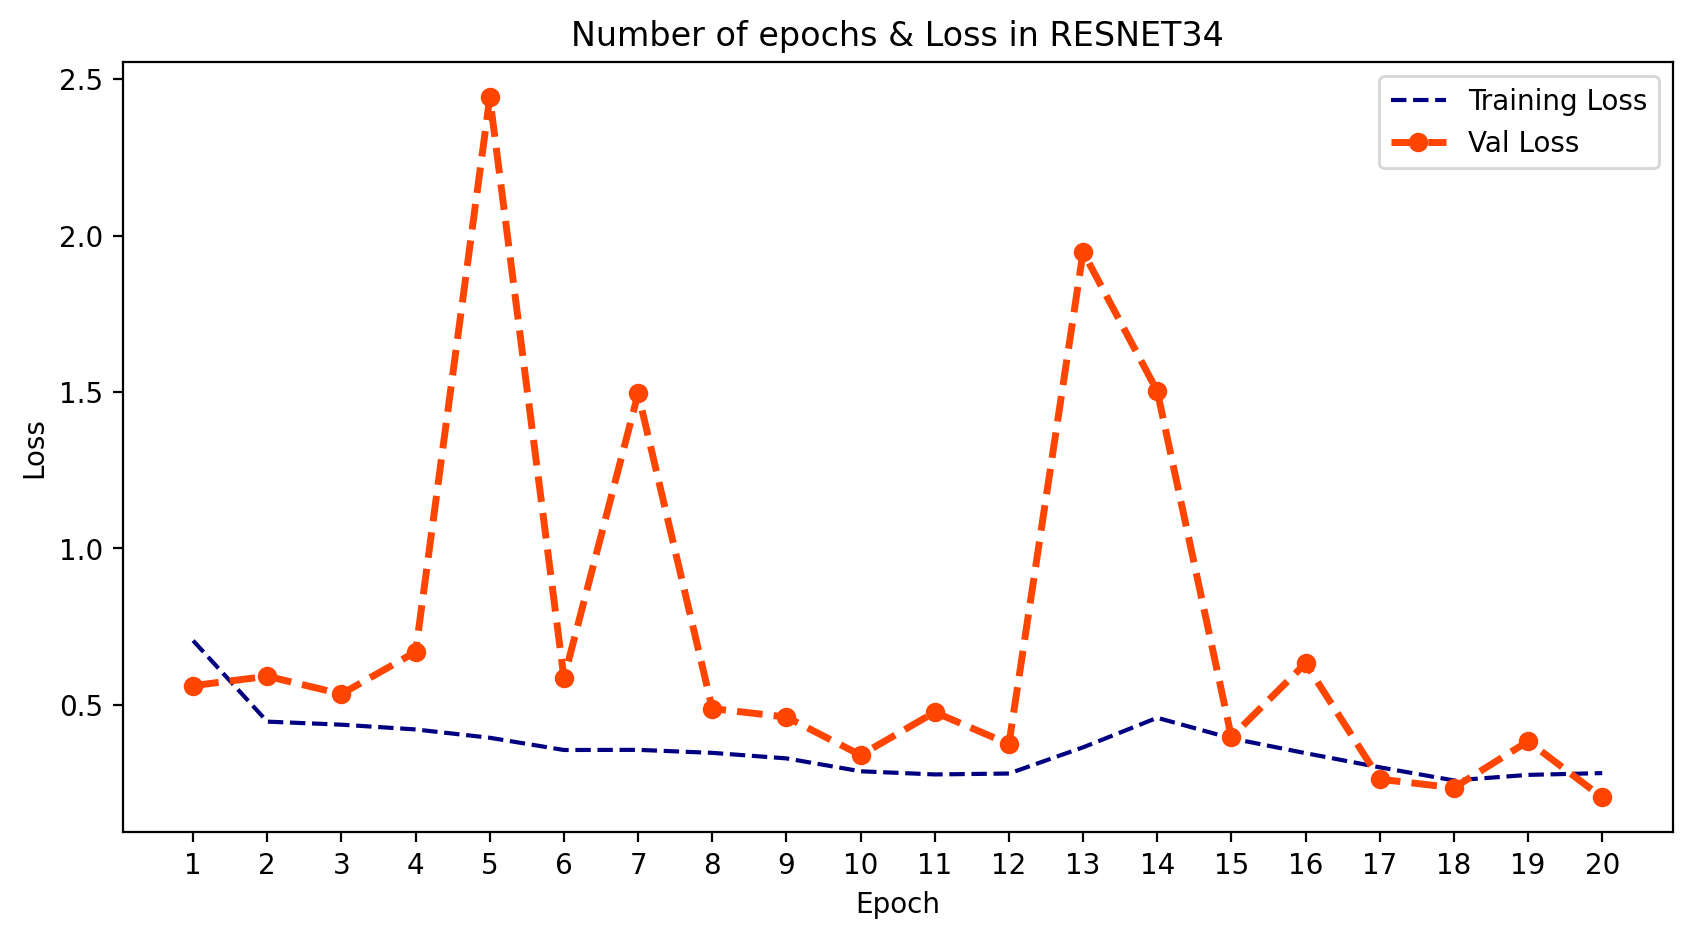

In [87]:
plt.figure(figsize=(10,5), dpi=200)
plt.plot(epoch_count, training_loss_res, 'r--', color= 'navy')
plt.plot(epoch_count, val_loss_res, '--bo',color= 'orangered', linewidth = '2.5', label='line with marker')
plt.legend(['Training Loss', 'Val Loss'])
plt.title('Number of epochs & Loss in RESNET34')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(np.arange(1,21,1))
plt.show();

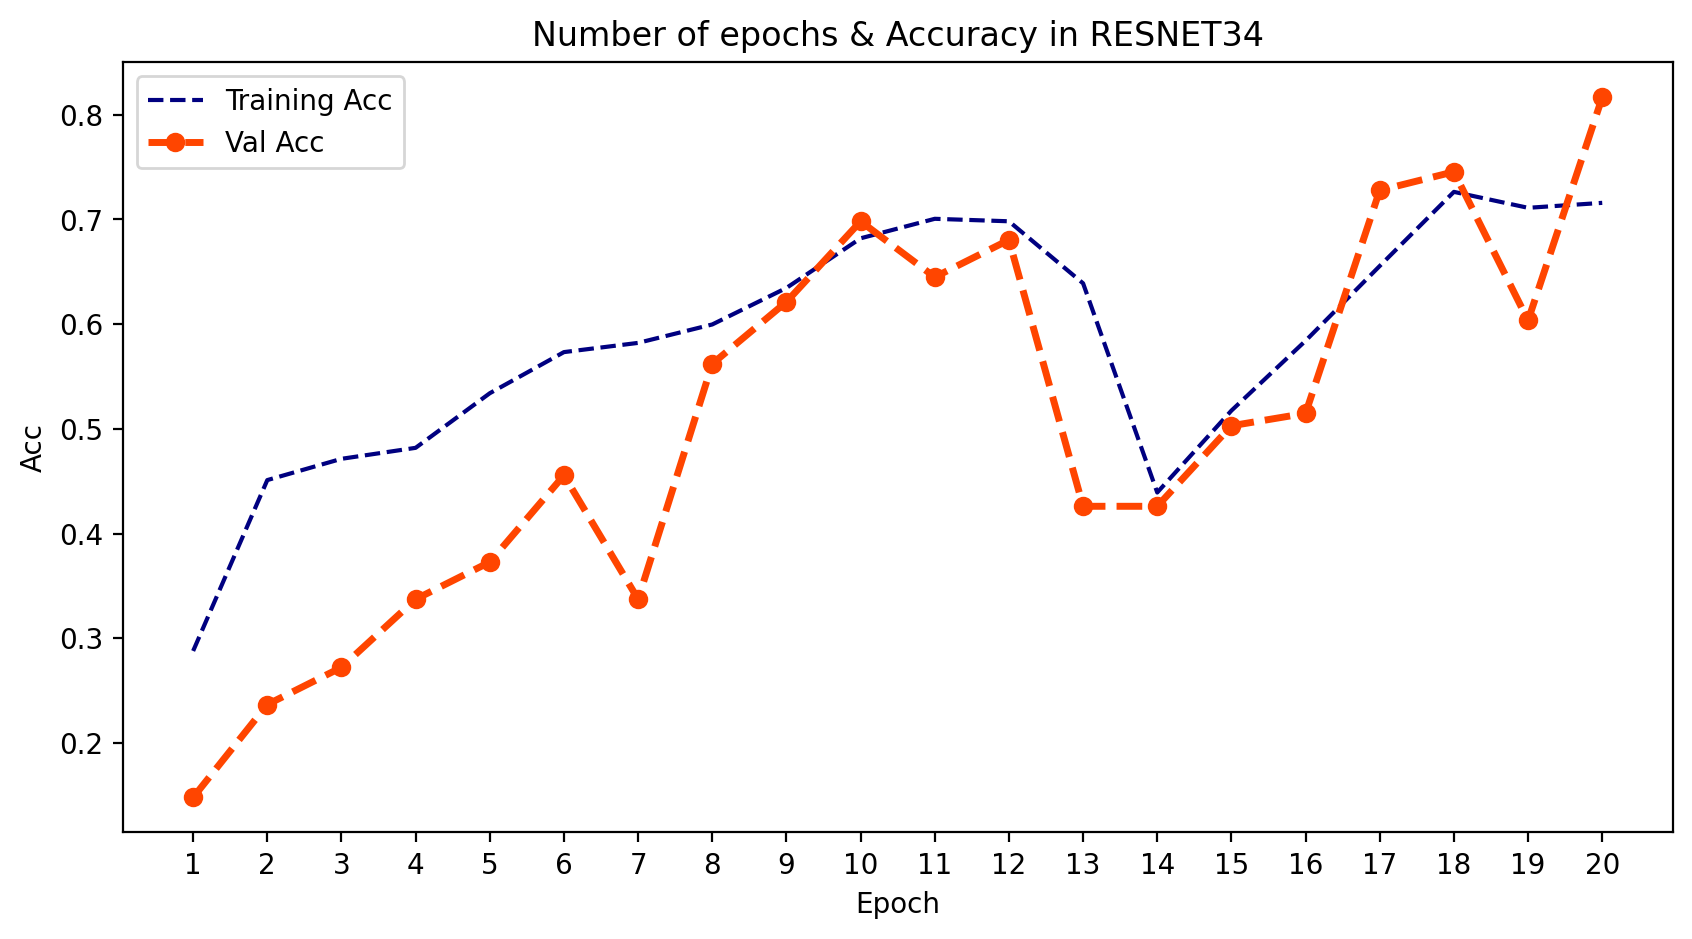

In [88]:
plt.figure(figsize=(10,5), dpi=200)
plt.plot(epoch_count, training_acc_res, 'r--', color= 'navy')
plt.plot(epoch_count, val_acc_res, '--bo',color= 'orangered', linewidth = '2.5', label='line with marker')
plt.legend(['Training Acc', 'Val Acc'])
plt.title('Number of epochs & Accuracy in RESNET34')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.xticks(np.arange(1,21,1))
plt.plot();
plt.show();

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 211ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 392ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 345ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 402ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 409ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 476ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 455ms/step
Accuracy (Sampled): 0.8144
Classification Report (Sampled):
              precision    recall  f1-score   support

           0       0.89      0.62      0.73       132
           1       0.84      0.92      0.88       176
           2       0.69      0.80      0.74        85
           3       0.75      0.63      0.69        68
           4       0.84      1.00      0.91       110

    accuracy                           0.81       571
   macro avg       0.80      0.79      0.79       571
weighted avg       0.82      0.81      0.81       571

[[ 82  11  22   3  14]
 [  4 162   3   3   4]
 [  3   3  68  

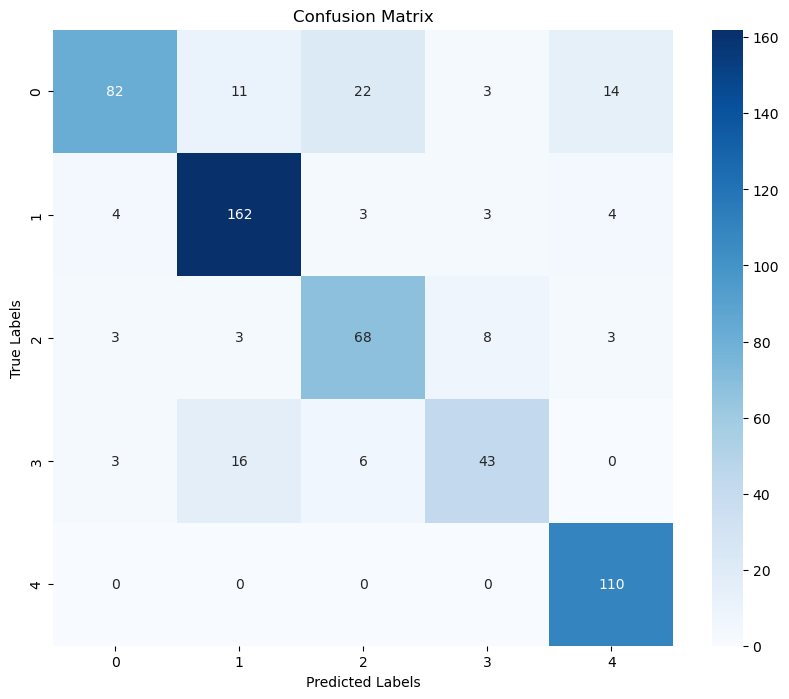

In [89]:
# Define a function to sample data from a DataFrameIterator
def sample_from_iterator(iterator, sample_size):
    sampled_data = []
    for _ in range(sample_size):
        try:
            x_batch, y_batch = next(iterator)
            sampled_data.append((x_batch, y_batch))
        except StopIteration:
            break
    return sampled_data

# Reset the iterator
valDataset.reset()

# Sample size
sample_size = 10 # Adjust as needed

# Sample from the iterator
sampled_data = sample_from_iterator(valDataset, sample_size)

# Initialize lists for predictions and true labels
val_predictions = []
y_true = []

# Process sampled data
for x_batch, y_batch in sampled_data:
    # Make predictions for the batch using the trained model
    batch_predictions = model_Res.predict(x_batch)
    val_predictions.append(batch_predictions)
    y_true.append(y_batch)

# Concatenate predictions and true labels
val_predictions = np.concatenate(val_predictions, axis=0)
y_true = np.concatenate(y_true, axis=0)

# Get predicted labels
y_pred = np.argmax(val_predictions, axis=1)

# Convert y_true from one-hot to label indices (if needed)
y_true_labels = np.argmax(y_true, axis=1) if y_true.ndim > 1 else y_true

# Calculate and print accuracy
accuracy = accuracy_score(y_true_labels, y_pred)
print(f"Accuracy (Sampled): {accuracy:.4f}")

# Generate classification report
print("Classification Report (Sampled):")
print(classification_report(y_true_labels, y_pred))

# Optionally, plot the confusion matrix
conf_matrix = confusion_matrix(y_true_labels, y_pred)
print(conf_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=[str(i) for i in range(conf_matrix.shape[1])], 
            yticklabels=[str(i) for i in range(conf_matrix.shape[0])])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **1. Comparision of (Acc)s and (Loss)s**

  - We can put all of the results in a one plot and comparing the behavior of models outputs.
   



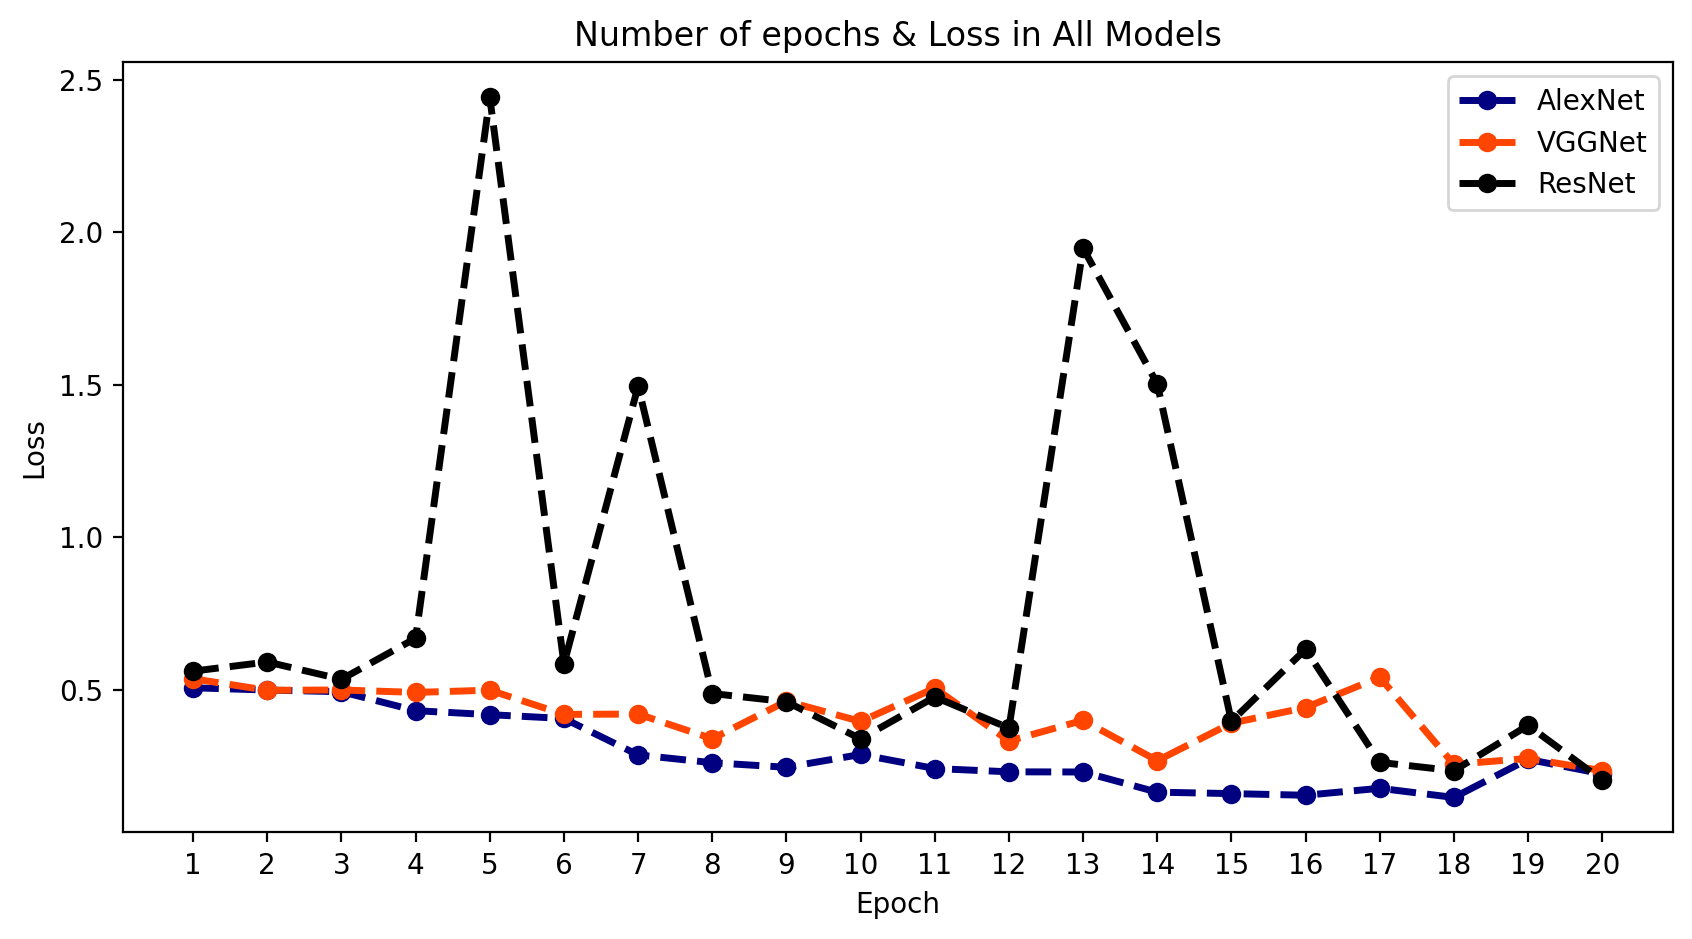

In [90]:
plt.figure(figsize=(10,5), dpi=200)

plt.plot(epoch_count, val_loss_alex, '--bo',color= 'navy',
         linewidth = '2.5', label='line with marker')
plt.plot(epoch_count, val_loss_vgg, '--bo',color= 'orangered',
         linewidth = '2.5', label='line with marker')
plt.plot(epoch_count, val_loss_res, '--bo',color= 'black',
         linewidth = '2.5', label='line with marker')
plt.legend(['AlexNet', 'VGGNet','ResNet'])
plt.title('Number of epochs & Loss in All Models')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(np.arange(1,21,1))
plt.show();

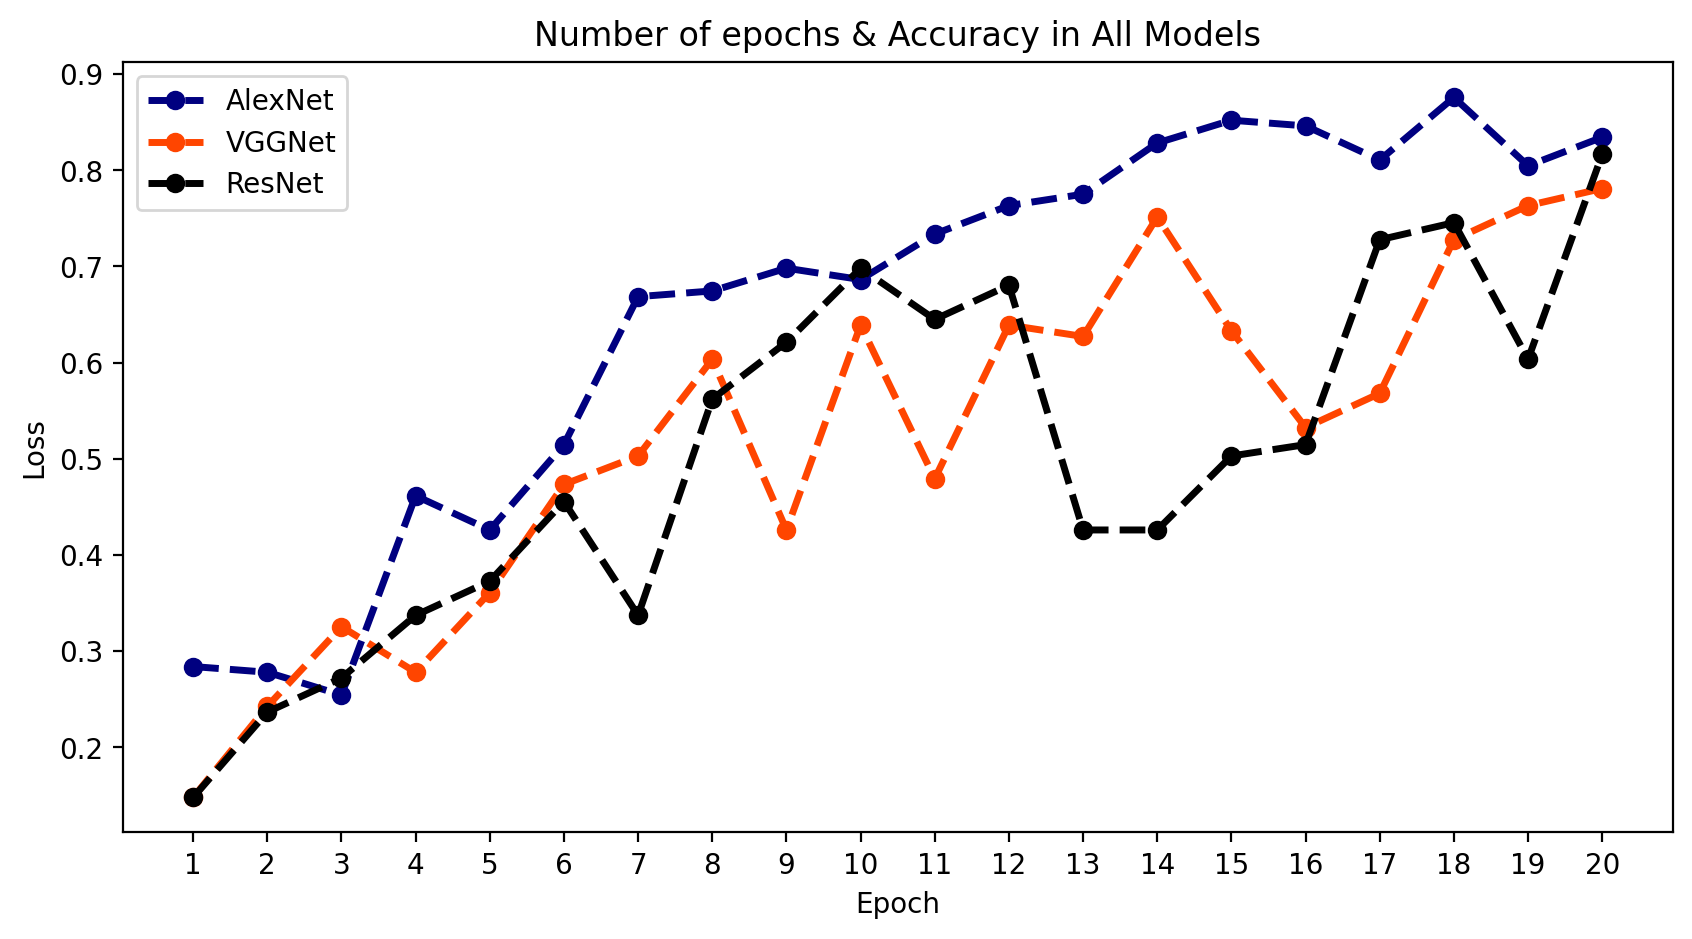

In [91]:
plt.figure(figsize=(10,5), dpi=200)

plt.plot(epoch_count, val_acc_alex, '--bo',color= 'navy',
         linewidth = '2.5', label='line with marker')
plt.plot(epoch_count, val_acc_vgg, '--bo',color= 'orangered',
         linewidth = '2.5', label='line with marker')
plt.plot(epoch_count, val_acc_res, '--bo',color= 'black',
         linewidth = '2.5', label='line with marker')
plt.legend(['AlexNet', 'VGGNet','ResNet'])
plt.title('Number of epochs & Accuracy in All Models')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(np.arange(1,21,1))
plt.show();

# Hyper paramter tunning unsing Alexnet

In [92]:
Batch_size = 64
Img_height = 240
Img_width = 240
trainGenerator = ImageDataGenerator(
    rescale=1./255,
    zca_whitening=True,
    rotation_range=30.,
    fill_mode='nearest',
)
valGenerator = ImageDataGenerator(rescale=1./255.)
testGenerator = ImageDataGenerator(rescale=1./255.)

trainDataset = trainGenerator.flow_from_dataframe(
  dataframe=train_df,
  class_mode="categorical",
  x_col="image",
  y_col="label",
  batch_size=Batch_size,
  seed=42,
  shuffle=True,
  target_size=(Img_height,Img_width) #set the height and width of the images
)

testDataset = testGenerator.flow_from_dataframe(
  dataframe=test_df,
  class_mode='categorical',
  x_col="image",
  y_col="label",
  batch_size=Batch_size,
  seed=42,
  shuffle=True,
  target_size=(Img_height,Img_width)
)

valDataset = valGenerator.flow_from_dataframe(
  dataframe=val_df,
  class_mode='categorical',
  x_col="image",
  y_col="label",
  batch_size=Batch_size,
  seed=42,
  shuffle=True,
  target_size=(Img_height,Img_width)
)

Found 2953 validated image filenames belonging to 5 classes.
Found 807 validated image filenames belonging to 5 classes.
Found 169 validated image filenames belonging to 5 classes.


In [94]:
pip install keras-tuner


python(40204) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.1 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [95]:
from keras_tuner import HyperModel
from keras_tuner.tuners import RandomSearch

class AlexNetHyperModel(HyperModel):
    def build(self, hp):
        inp = layers.Input((240, 240, 3))
        x = layers.Conv2D(hp.Int('conv1_filters', 64, 128, step=32), 11, 4, activation='relu')(inp)
        x = layers.BatchNormalization()(x)
        x = layers.MaxPooling2D(3, 2)(x)
        x = layers.Conv2D(hp.Int('conv2_filters', 128, 256, step=32), 5, 1, activation='relu')(x)
        x = layers.BatchNormalization()(x)
        x = layers.MaxPooling2D(3, 2)(x)
        x = layers.Conv2D(hp.Int('conv3_filters', 192, 384, step=64), 3, 1, activation='relu')(x)
        x = layers.Conv2D(hp.Int('conv4_filters', 192, 384, step=64), 3, 1, activation='relu')(x)
        x = layers.Conv2D(hp.Int('conv5_filters', 128, 256, step=32), 3, 1, activation='relu')(x)
        x = layers.MaxPooling2D(3, 2)(x)
        x = layers.Flatten()(x)
        x = layers.Dense(hp.Int('dense_units', 2048, 4096, step=1024), activation='relu')(x)
        x = layers.Dropout(hp.Float('dropout_rate', 0.3, 0.7, step=0.1))(x)
        x = layers.Dense(5, activation='softmax')(x)

        model_Alex = models.Model(inputs=inp, outputs=x)

        model_Alex.compile(loss=BinaryCrossentropy(),
                           optimizer=Adam(learning_rate=hp.Float('learning_rate', 1e-5, 1e-2, sampling='log')),
                           metrics=['accuracy'])
        
        return model_Alex


In [96]:
# Define the tuner
tuner = RandomSearch(
    AlexNetHyperModel(),
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='/Users/prajwalgowdakr/Desktop/fullstack/DriverBehavior//hyperparameter_tuning',
    project_name='alexnet_tuning'
)

# Display search space summary
tuner.search_space_summary()

# Perform hyperparameter tuning
tuner.search(trainDataset, epochs=20, validation_data=valDataset)

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Summary of the best model
best_model.summary()
best_model.save('best_alexnet_model.keras')


Trial 5 Complete [00h 24m 19s]
val_accuracy: 0.9585798978805542

Best val_accuracy So Far: 0.9585798978805542
Total elapsed time: 04h 09m 22s


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 240, 240, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 58, 58, 64)     │        23,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 58, 58, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 11, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 9, 9, 384)      │       442,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 7, 7, 192)      │       663,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 5, 5, 128)      │       221,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │     2,101,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │        20,485 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,678,533 (14.03 MB)

 Trainable params: 3,678,149 (14.03 MB)

 Non-trainable params: 384 (1.50 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Accuracy (Sampled): 0.9597
Classification Report (Sampled):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       136
           1       0.98      0.96      0.97       176
           2       0.90      1.00      0.95        87
           3       0.90      0.96      0.93        67
           4       0.97      0.90      0.94       105

    accuracy                           0.96       571
   macro avg       0.95      0.96      0.95       571
weighted avg       0.96      0.96      0.96       571



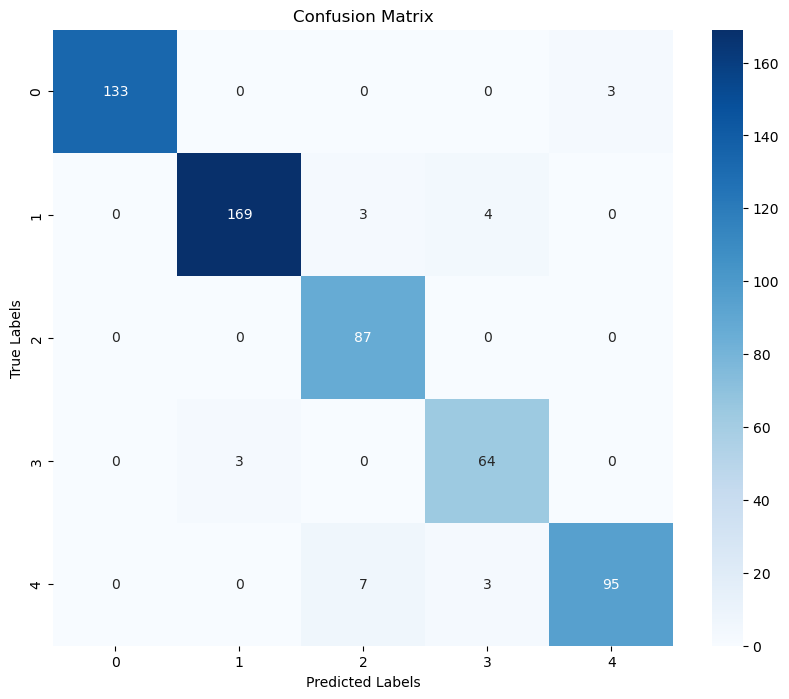

In [97]:
# Load the best model
from tensorflow.keras.models import load_model

best_model = load_model('best_alexnet_model.keras')

# Define a function to sample data from a DataFrameIterator
def sample_from_iterator(iterator, sample_size):
    sampled_data = []
    for _ in range(sample_size):
        try:
            x_batch, y_batch = next(iterator)
            sampled_data.append((x_batch, y_batch))
        except StopIteration:
            break
    return sampled_data

# Reset the iterator (assuming valDataset is a tf.keras.preprocessing.image.DataFrameIterator or similar)
valDataset.reset()

# Sample size
sample_size = 10  # Adjust as needed

# Sample from the iterator
sampled_data = sample_from_iterator(valDataset, sample_size)

# Initialize lists for predictions and true labels
val_predictions = []
y_true = []

# Process sampled data
for x_batch, y_batch in sampled_data:
    # Make predictions for the batch
    batch_predictions = best_model.predict(x_batch)
    val_predictions.append(batch_predictions)
    y_true.append(y_batch)

# Concatenate predictions and true labels
val_predictions = np.concatenate(val_predictions, axis=0)
y_true = np.concatenate(y_true, axis=0)

# Get predicted labels
y_pred = np.argmax(val_predictions, axis=1)

# Convert y_true from one-hot to label indices (if needed)
y_true_labels = np.argmax(y_true, axis=1) if y_true.ndim > 1 else y_true

# Calculate and print accuracy
accuracy = accuracy_score(y_true_labels, y_pred)
print(f"Accuracy (Sampled): {accuracy:.4f}")

# Generate classification report
print("Classification Report (Sampled):")
print(classification_report(y_true_labels, y_pred))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_true_labels, y_pred)
conf_matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=[str(i) for i in range(conf_matrix.shape[1])], 
            yticklabels=[str(i) for i in range(conf_matrix.shape[0])])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [98]:
from tensorflow.keras.models import load_model
best_model = load_model('/Users/prajwalgowdakr/Desktop/fullstack/DriverBehavior/DriverBehaviorProject/Driver-Behavior-Dataset/BackEnd/best_alexnet_model.keras')
Batch_size = 64
Img_height = 240
Img_width = 240

['/Users/prajwalgowdakr/Desktop/fullstack/DriverBehavior/DriverBehaviorProject/Driver-Behavior-Dataset/BackEnd/talking_phone/img_11263.jpg']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
Predicted class for the image: talking_phone


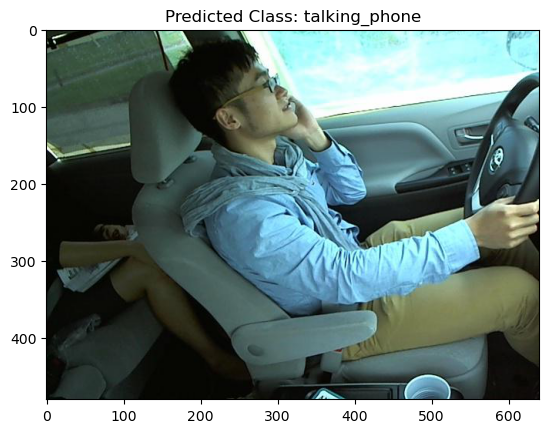

In [104]:
import os
import random
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def append_image_paths(folder_path, image_list):
    # List all files in the folder
    all_files = os.listdir(folder_path)
    
    # Filter out only image files (assuming they have extensions like .jpg, .png, etc.)
    image_files = [file for file in all_files if file.endswith(('.jpg', '.png', '.jpeg'))]
    
    # Take one random image from the list
    if image_files:
        random_image = random.choice(image_files)
        # Append the full path to the image list
        image_list.append(os.path.join(folder_path, random_image))

# Example usage
folder_path = "/Users/prajwalgowdakr/Desktop/fullstack/DriverBehavior/DriverBehaviorProject/Driver-Behavior-Dataset/BackEnd/safe_driving"
image_list_safe = []
append_image_paths(folder_path, image_list_safe)

print(image_list_safe)

if image_list_safe:  # Ensure there's at least one image
    single_image_path = image_list_safe[0]
    
    # Define the preprocess_image function
    def preprocess_image(image_path, img_height=240, img_width=240):
        img = image.load_img(image_path, target_size=(img_height, img_width))
        img_array = image.img_to_array(img)
        img_array /= 255.0
        img_array = np.expand_dims(img_array, axis=0)
        datagen = ImageDataGenerator(zca_whitening=True)
        img_array = datagen.standardize(img_array)
        return img_array

    processed_image = preprocess_image(single_image_path, img_height=240, img_width=240)

    # Assuming best_model is already loaded
    prediction = best_model.predict(processed_image)
    predicted_class = np.argmax(prediction, axis=1)[0]

    # Define label mapping
    label_mapping = {
        0: 'other_activity',
        1: 'safe_drive',
        2: 'talking_phone',
        3: 'texting_phone',
        4: 'turning'
    }

    # Map the predicted class to its corresponding string
    predicted_label = label_mapping[predicted_class]

    # Print the prediction result
    print(f"Predicted class for the image: {predicted_label}")

    # Optionally, display the image
    plt.imshow(image.load_img(single_image_path))
    plt.title(f"Predicted Class: {predicted_label}")
    plt.show()
else:
    print("No images found in the provided directory.")